In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

import pandas as pd





In [9]:
from matplotlib import rc
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
rc('font', **font)

In [10]:
def plot_residuals(x, y, y_fit, y_unc, xlabel="", ylabel="Residuals", save_as=""):
    residuals = y - y_fit
    plt.errorbar(x, residuals, yerr=y_unc, fmt='o', ecolor='lightgray', elinewidth=2, capsize=1)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save_as:
        plt.savefig(plotpath / save_as, bbox_inches="tight")
    plt.show()

def calculate_chi2(y, y_fit, y_unc, k):
    """
    Calculate the chi-squared statistic, reduced chi-squared, and chi-squared probability.
    Parameters:
    y (array-like): Observed data points.
    y_fit (array-like): Fitted data points.
    y_unc (array-like): Uncertainties in the observed data points.
    k (int): Number of fitted parameters.
    Returns:
    tuple: A tuple containing:
        - chi (float): The chi-squared statistic.
        - reduced_chi2 (float): The reduced chi-squared statistic.
        - chi2_prob (float): The probability of obtaining a chi-squared value at least as extreme as the one computed, given the degrees of freedom.
    """

    chi = np.sum(((y - y_fit) / y_unc) ** 2)
    dof = len(y) - k
    reduced_chi2 = chi / dof
    chi2_prob = 1 - chi2.cdf(chi, dof)
    return chi, reduced_chi2, chi2_prob

In [11]:
def format_parameters_with_errors(parameters, errors):
    def round_to_significant_figures(x, sig_figs=1):
        if x == 0:
            return 0
        else:
            return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)

    formatted_values = []
    for param, err in zip(parameters, errors):
        # Round error to one significant figure
        rounded_err = round_to_significant_figures(err, sig_figs=1)
        # Adjust parameter value to match error precision
        param_precision = int(np.floor(np.log10(rounded_err)))
        rounded_param = round(param, -param_precision)
        
        formatted_values.append(f"{rounded_param} ± {rounded_err}")

    return formatted_values

## Uncertainties 
Reference: [Keysight FAQs for Uncertainty](https://docs.keysight.com/kkbopen/understanding-voltage-measurement-accuracy-for-infiniivision-oscilloscopes-584425356.html#:~:text=and%20Infiniium%20oscilloscopes.-,DC%20vertical%20offset%20accuracy,up%20and%20down%20the%20screen.)
- Vertical scale was 50V/div (? not fully sure but makes sense) with 8 divisions (ranged from -2V to 2V) 
- No vertical offset
Uncertainty in voltage readings given by single-cursor accuracy
- Different than RSS (Root Mean Square), we sum errors from sources linearly instead of in quadrature 


In [12]:
from utils import meterman37xr_unc

batteryV = "1.54"
meterman37xr_unc(batteryV)

0.05154

In [13]:

# Load the Excel file into a DataFrame
# 'your_file.xlsx' should be the path to your Excel file
df = pd.read_excel('data/Q_oscillator_data.xlsx')

# To read a specific sheet by name:
df = pd.read_excel('data/Q_oscillator_data.xlsx', sheet_name='Ex1')

# To read a specific sheet by index (0 for the first sheet):
# df = pd.read_excel('your_file.xlsx', sheet_name=0)

# Print the first few rows of the DataFrame
#print(df.head())

#print(df.loc[2])

# Access a specific column
sin_freq = df['Sin Frequency (KHz)']
print(sin_freq.head(29))


column_data3 = df['input uncertainty']
column_data4 = df[' Output uncertainty']
column_data5 = df['Phase (degrees)']
column_data6=df[' Input voltage (V)']


input_volt = column_data6.tolist()
input_volt = np.array(input_volt)
input_unc = column_data3.tolist() 
output_unc = column_data4.tolist()
phase = column_data5.tolist()

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

sin_list = sin_freq.tolist()    # returns a list of values
#values_tuple = tuple(row) 

Amp_ratio = df['V_r / v_in']
print(Amp_ratio.head(29))

column_data2 = df['Output  Voltage (V)']
output_volt = column_data2.tolist()  

# Access a specific cell (e.g., row 0, column 'ColumnName')
#cell_value = df.loc[0, ]
#print(cell_value)
#

amplitude = Amp_ratio.tolist()   

print(sin_list)

print(amplitude)
ratio_meas = np.asarray(Amp_ratio, dtype=float)         # <-- measured amplitude ratio from DF
Vout_meas  = np.asarray(output_volt, dtype=float)       # <-- measured Vout from D

0     0.4004
1     0.8003
2     1.1979
3     1.5993
4     2.0010
5     2.3990
6     2.7990
7     3.2000
8     3.5990
9     4.0000
10    4.4040
11    4.7500
12    4.7730
13    4.8060
14    4.8260
15    4.8490
16    4.8750
17    4.9000
18    4.9250
19    4.9500
20    4.9740
21    5.0000
22    5.2030
23    5.6060
24    6.0000
Name: Sin Frequency (KHz), dtype: float64
0     0.026775
1     0.054588
2     0.084086
3     0.117864
4     0.156851
5     0.203504
6     0.261646
7     0.336448
8     0.434465
9     0.565935
10    0.710062
11    0.799135
12    0.801250
13    0.801923
14    0.801878
15    0.802152
16    0.806999
17    0.812489
18    0.812123
19    0.811500
20    0.810296
21    0.808491
22    0.777165
23    0.771245
24    0.575278
Name: V_r / v_in, dtype: float64
[0.4004, 0.8003, 1.1979, 1.5993, 2.001, 2.399, 2.799, 3.2, 3.599, 4.0, 4.404, 4.75, 4.773, 4.806, 4.826, 4.849, 4.875, 4.9, 4.925, 4.95, 4.974, 5.0, 5.203, 5.606, 6.0]
[0.026774791473586655, 0.054587581093605196, 0.0840861709

In [14]:
def phase_uncertainty_deg(
    sin_list,
    sec_per_div,
    reading_seconds=None,
    screen_divs=10,
    years_since_cal=0.0,
    same_channel=True,
    include_xy_floor=False,
    xy_floor_freq_Hz=1.0e6,
    xy_floor_deg=0.5
):
    """
    Estimate phase uncertainty (degrees) for Keysight 1000 X-Series when phase is
    derived from a time difference: phi = 2*pi*f*Δt.

    Based on datasheet ΔTime (cursor) accuracy:
      σ_Δt ≈ (timebase_acc * |reading|) + (0.0016 * screen_width) + (200 ps if same-channel)

    Parameters
    ----------
    sin_list : float or array
        Signal frequency.
    sec_per_div : float
        Horizontal scale (seconds/div) used for the measurement.
    reading_seconds : float or array, optional
        The Δt "reading" you actually measured with cursors (seconds).
        If None, assumes one period, reading_seconds = 1/sin_list (conservative for phase).
    screen_divs : int, default 10
        Number of horizontal divisions (Keysight screens are typically 10).
    years_since_cal : float, default 0.0
        Add ±5 ppm/year to the 50 ppm timebase spec.
    same_channel : bool, default True
        If Δt was measured on the SAME channel (e.g., between two edges on one trace),
        include the extra ±200 ps term from the spec. If False, omit it (spec only
        states the 200 ps explicitly for same-channel).
    include_xy_floor : bool, default False
        If you actually measured phase via XY/Lissajous (not Δt), you can add a
        systematic floor of ~0.5° at 1 MHz by enabling this.
    xy_floor_freq_Hz : float, default 1e6
        Reference frequency for the XY phase error floor.
    xy_floor_deg : float, default 0.5
        Quoted XY phase error near the reference frequency (deg).

    Returns
    -------
    sigma_phi_deg : ndarray
        Phase uncertainty in degrees (1σ, approximate).
    """
    f = np.asarray(sin_list, dtype=float)
    # Use provided Δt reading; otherwise use one period as a conservative stand-in
    if reading_seconds is None:
        reading = 1.0 / np.maximum(f, np.finfo(float).tiny)
    else:
        reading = np.asarray(reading_seconds, dtype=float)

    # Screen width in seconds
    screen_width = float(sec_per_div) * float(screen_divs)

    # Timebase accuracy (ppm -> fraction)
    timebase_acc = (50e-6) + (5e-6 * float(years_since_cal))

    # Cursor Δt accuracy terms (absolute, in seconds)
    term_timebase = np.abs(timebase_acc * reading)
    term_screen   = 0.0016 * screen_width
    term_samech   = 200e-12 if same_channel else 0.0

    sigma_dt = term_timebase + term_screen + term_samech  # linear sum per datasheet expression

    # Convert to phase uncertainty: σ_phi ≈ 2π f σ_Δt (radians) -> degrees
    sigma_phi_deg = np.degrees(2.0 * np.pi * f * sigma_dt)

    # Optional XY/Lissajous systematic floor near 1 MHz (datasheet note)
    if include_xy_floor:
        # Apply as a floor (take the larger of computed σ and floor when f ~ xy_floor_freq_Hz)
        # Without a frequency dependence provided, we apply a flat floor.
        sigma_phi_deg = np.maximum(sigma_phi_deg, xy_floor_deg)

    return sigma_phi_deg


=== Phase Fit (Series RLC, constrained) ===
constraints: phi0=0, Q=free, tight=True (±3.5σ)
best sign = +  | added 0 × 180° to unwrap

--- Theoretical (from L0,R0,C0) ---
f0_th = 4730.35 ± 2e+02 Hz
Q_th  = 3.15775 ± 0.13

--- Measured (from fit) ---
f0_fit = 4901.78 ± 8.8 Hz
Q_fit  = 2.68992 ± 0.075

chi^2 = 13.18, DOF = 22, reduced chi^2 = 0.60


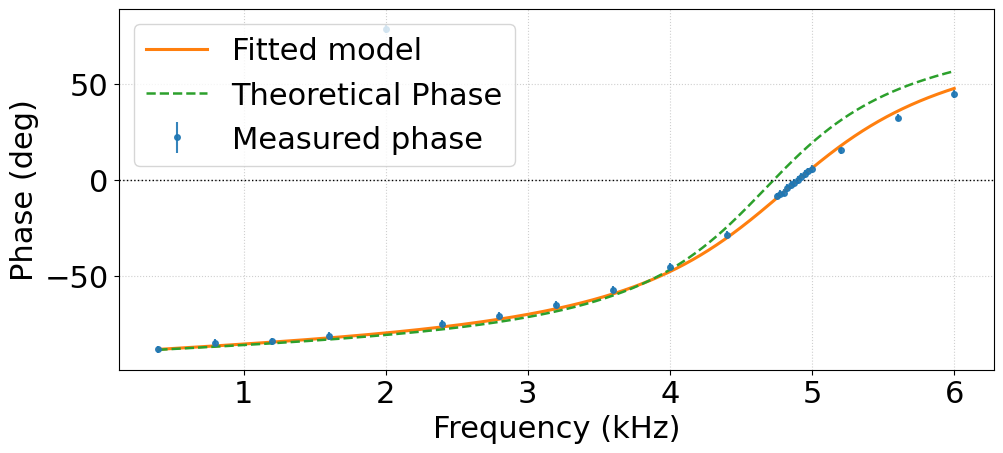

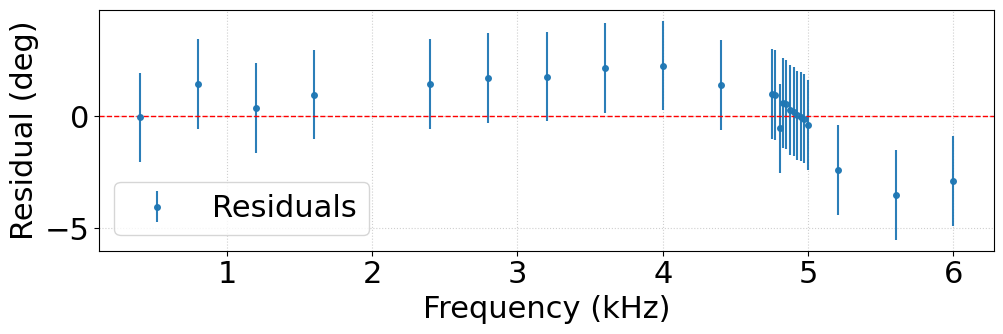

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# =============== USER DATA ===============
# sin_list = np.array([...], dtype=float)    # Hz or kHz (auto-detect)
# phase     = np.array([...], dtype=float)   # degrees

USE_CONST_SIGMA = True
SIGMA_phase = 2.0

SEC_PER_DIV, SCREEN_DIVS, YEARS_SINCE_CAL = 5e-4, 10, 0.0
SAME_CHANNEL_DT = False

L0, R0, C0 = 114.0e-3, 1.073e3, 9.93e-9
L_disp, R_disp, C_disp = "0.1140", "1073.0", "0.00000000993"

SHOW_THEORY_BAND = True
MC_SAMPLES_BAND  = 1500

# ====== Make the FIT "worse" (i.e., less flexible) ======
FIT_PHI0_ZERO       = True     # keep phi0 = 0
FIT_FIX_Q_TO_THEORY = False    # <-- leave Q free so we can estimate its uncertainty
FIT_TIGHT_TO_THEORY = True
N_SIGMA_BOUNDS      = 3.5

# ---------- Helpers ----------
def keysight_phase_unc_deg(sin_list, sec_per_div, reading_seconds=None,
                           screen_divs=10, years_since_cal=0.0, same_channel=True):
    f = np.asarray(sin_list, dtype=float)
    reading = (1.0/np.maximum(f, np.finfo(float).tiny)
               if reading_seconds is None else np.asarray(reading_seconds, dtype=float))
    screen_width = float(sec_per_div)*float(screen_divs)
    timebase_acc = 50e-6 + 5e-6*float(years_since_cal)
    sigma_dt = np.abs(timebase_acc*reading) + 0.0016*screen_width + (200e-12 if same_channel else 0.0)
    return np.degrees(2*np.pi*f*sigma_dt)

def phase_model_omega_signed(omega, w0, Q, phi0, sgn):
    x = (omega/w0) - (w0/omega)
    return phi0 + sgn*np.arctan(Q*x)

def series_rlc_w0_Q(L, R, C):
    w0 = 1/np.sqrt(L*C)
    f0 = w0/(2*np.pi)
    Q  = (w0*L)/R
    return w0, f0, Q

# --- Your meter-uncertainty helpers (unchanged, assumes meterman37xr_unc exists) ---
def safe_meter_unc(s, mode):
    s = str(s)
    if "." not in s:
        s = f"{float(s):.1f}"
    return float(meterman37xr_unc(s, mode=mode))

def theory_from_parts_with_unc(L0, R0, C0, Ld, Rd, Cd):
    uL = safe_meter_unc(Ld, "I")
    uR = safe_meter_unc(Rd, "R")
    uC = safe_meter_unc(Cd, "C")
    _, f0, Q = series_rlc_w0_Q(L0, R0, C0)
    rel_uf0 = 0.5*np.sqrt((uL/L0)**2 + (uC/C0)**2)
    uf0 = f0*rel_uf0
    rel_uQ = np.sqrt((uR/R0)**2 + 0.25*((uL/L0)**2 + (uC/C0)**2))
    uQ = Q*rel_uQ
    return f0, uf0, Q, uQ

def unwrap_phase(phi_deg):
    phi_rad = np.deg2rad(np.asarray(phi_deg, dtype=float))
    return np.rad2deg(np.unwrap(phi_rad))

def try_k_offsets(phi_deg_unwrapped, klist=(-2,-1,0,1,2)):
    return [phi_deg_unwrapped + 180.0*k for k in klist], klist

# ---------- NEW: extract parameter errors by name ----------
def _param_errors_dict(labels, params, cov):
    """Return dict of best-fit values and 1σ errors for named params in 'labels'."""
    out = {name: {"val": None, "err": None} for name in labels}
    if params is None:
        return out
    for i, name in enumerate(labels):
        out[name]["val"] = float(params[i])
        if (cov is not None) and np.all(np.isfinite(cov)) and cov.shape[0] > i:
            err = np.sqrt(max(cov[i, i], 0.0))
            out[name]["err"] = float(err)
    return out

# ---------- Fitting helpers that respect the constraint toggles ----------
def make_model_for_cf(sgn, Q_th):
    # Return a model function with signature f(x, *params) matching the chosen constraints
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        # fit: (w0)
        def model_for_cf(x, w0):
            return phase_model_omega_signed(x, w0, Q_th, 0.0, sgn)
        param_labels = ("w0",)
    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        # fit: (w0, Q)
        def model_for_cf(x, w0, Q):
            return phase_model_omega_signed(x, w0, Q, 0.0, sgn)
        param_labels = ("w0","Q")
    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        # fit: (w0, phi0)
        def model_for_cf(x, w0, phi0):
            return phase_model_omega_signed(x, w0, Q_th, phi0, sgn)
        param_labels = ("w0","phi0")
    else:
        # full: (w0, Q, phi0)
        def model_for_cf(x, w0, Q, phi0):
            return phase_model_omega_signed(x, w0, Q, phi0, sgn)
        param_labels = ("w0","Q","phi0")
    return model_for_cf, param_labels

def fit_once(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th):
    omega   = 2*np.pi*sin_list
    phi_rd  = np.deg2rad(phi_deg)
    sigma_rd= np.deg2rad(sigma_deg)

    model_for_cf, labels = make_model_for_cf(sgn, Q_th)

    params, cov = curve_fit(
        model_for_cf, omega, phi_rd,
        p0=p0, bounds=bounds,
        sigma=sigma_rd, absolute_sigma=True, maxfev=120000
    )
    phi_fit = model_for_cf(omega, *params)
    res = (phi_rd - phi_fit) / sigma_rd
    chi2 = float(np.sum(res**2))
    dof  = int(len(sin_list) - len(params))
    return params, cov, phi_fit, res, chi2, dof, labels

def robust_refit(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th):
    params, cov, phi_fit, res, chi2, dof, labels = fit_once(sin_list, phi_deg, sgn, p0, bounds, sigma_deg, Q_th)
    mask = np.ones_like(sin_list, dtype=bool)
    mask[np.abs(res) > 3.0] = False
    if mask.sum() >= max(8, len(sin_list)//2):
        params, cov, phi_fit, res, chi2, dof, labels = fit_once(sin_list[mask], phi_deg[mask], sgn, params, bounds, sigma_deg[mask], Q_th)
    return params, cov, phi_fit, res, chi2, dof, labels, mask

# ---------- Main pipeline ----------
def fit_phase_plot(sin_list, phase):
    # 1) Frequency units
    sin_list = np.asarray(sin_list, dtype=float)
    if sin_list.max() < 100:   # likely kHz provided
        sin_list = sin_list * 1e3

    # 2) Phase unwrap + 180° candidates
    phi_deg_unw = unwrap_phase(phase)
    phi_candidates, klist = try_k_offsets(phi_deg_unw)

    # 3) Phase σ (deg)
    if USE_CONST_SIGMA:
        sigma_deg = np.full_like(sin_list, SIGMA_phase, dtype=float)
    else:
        sigma_deg = keysight_phase_unc_deg(sin_list, SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)

    # 4) Theory (for priors/bounds only — theory curve itself unchanged)
    f0_th, uf0, Q_th, uQ = theory_from_parts_with_unc(L0, R0, C0, L_disp, R_disp, C_disp)
    w0_th = 2*np.pi*f0_th

    # Build p0 & bounds respecting constraints
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
        bounds_rl = ([w0_lo], [w0_hi])

    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th, max(0.2, Q_th)]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
            Q_lo,  Q_hi  = max(0.05, Q_th - N_SIGMA_BOUNDS*uQ),           Q_th + N_SIGMA_BOUNDS*uQ
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
            Q_lo,  Q_hi  = 0.05, 500.0
        bounds_rl = ([w0_lo, Q_lo], [w0_hi, Q_hi])

    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        p0_base = [w0_th, 0.0]
        if FIT_TIGHT_TO_THEORY:
            w0_lo, w0_hi = 2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), 2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0)
        else:
            w0_lo, w0_hi = 0.5*w0_th, 1.5*w0_th
        bounds_rl = ([w0_lo, -np.pi], [w0_hi, np.pi])

    else:
        p0_base = [w0_th, max(0.2, Q_th), 0.0]
        if FIT_TIGHT_TO_THEORY:
            bounds_rl = ([2*np.pi*max(1e-6, f0_th - N_SIGMA_BOUNDS*uf0), max(0.05, Q_th - N_SIGMA_BOUNDS*uQ), -np.pi],
                         [2*np.pi*(f0_th + N_SIGMA_BOUNDS*uf0),          Q_th + N_SIGMA_BOUNDS*uQ,            np.pi])
        else:
            bounds_rl = ([0.5*w0_th, 0.05, -np.pi], [1.5*w0_th, 500.0, np.pi])

    # 5) Search over sign and k*180° offsets (pick best)
    best = None
    for sgn in (+1, -1):
        for phi_try, k in zip(phi_candidates, klist):
            try:
                params, cov, phi_fit, res, chi2, dof, labels, mask = robust_refit(
                    sin_list, phi_try, sgn, p0_base, bounds_rl, sigma_deg, Q_th
                )
                chi2r = chi2/dof if dof > 0 else np.inf
                if (best is None) or (chi2r < best["chi2r"]):
                    best = dict(params=params, cov=cov, phi_fit=phi_fit, res=res, chi2=chi2, dof=dof,
                                chi2r=chi2r, sgn=sgn, k=k, phi_obs=phi_try, mask=mask, labels=labels)
            except Exception:
                continue

    if best is None:
        raise RuntimeError("Fit failed for all sign/offset combinations.")

    # Unpack params respecting constraints (for reporting/plots)
    par = best["params"]
    if FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        w0_fit,     = par;  Q_fit = Q_th;   phi0_fit = 0.0
    elif FIT_PHI0_ZERO and not FIT_FIX_Q_TO_THEORY:
        w0_fit, Q_fit = par; phi0_fit = 0.0
    elif not FIT_PHI0_ZERO and FIT_FIX_Q_TO_THEORY:
        w0_fit, phi0_fit = par; Q_fit = Q_th
    else:
        w0_fit, Q_fit, phi0_fit = par

    perr = np.sqrt(np.diag(best["cov"])) if np.all(np.isfinite(best["cov"])) else np.array([np.nan]*len(par))
    # ---------- NEW: get per-parameter errors by name ----------
    per_param = _param_errors_dict(best["labels"], best["params"], best["cov"])
    # Errors for derived quantities
    u_w0 = per_param.get("w0", {}).get("err", None)
    u_Q  = per_param.get("Q",  {}).get("err", None)
    u_f0 = (u_w0/(2*np.pi)) if (u_w0 is not None) else None

    print("\n=== Phase Fit (Series RLC, constrained) ===")
    print(f"constraints: phi0={'0' if FIT_PHI0_ZERO else 'free'}, Q={'theory' if FIT_FIX_Q_TO_THEORY else 'free'}, tight={FIT_TIGHT_TO_THEORY} (±{N_SIGMA_BOUNDS}σ)")
    print(f"best sign = {'+' if best['sgn']>0 else '-'}  | added {best['k']} × 180° to unwrap")
    # ---------- NEW: clear, side-by-side theory vs measured ----------
    print("\n--- Theoretical (from L0,R0,C0) ---")
    print(f"f0_th = {f0_th:.6g} ± {uf0:.2g} Hz")
    print(f"Q_th  = {Q_th:.6g} ± {uQ:.2g}")

    print("\n--- Measured (from fit) ---")
    if u_f0 is not None:
        print(f"f0_fit = {w0_fit/(2*np.pi):.6g} ± {u_f0:.2g} Hz")
    else:
        print(f"f0_fit = {w0_fit/(2*np.pi):.6g} Hz  (uncertainty N/A)")
    if FIT_FIX_Q_TO_THEORY:
        print(f"Q_fit  = {Q_fit:.6g}   (fixed to theory; uncertainty N/A)")
    else:
        if u_Q is not None:
            print(f"Q_fit  = {Q_fit:.6g} ± {u_Q:.2g}")
        else:
            print(f"Q_fit  = {Q_fit:.6g} (uncertainty N/A)")
    if not FIT_PHI0_ZERO:
        u_phi0 = per_param.get("phi0", {}).get("err", None)
        if u_phi0 is None:
            print(f"phi0   = {np.rad2deg(phi0_fit):.3f} deg (uncertainty N/A)")
        else:
            print(f"phi0   = {np.rad2deg(phi0_fit):.3f} ± {np.rad2deg(u_phi0):.3f} deg")

    print(f"\nchi^2 = {best['chi2']:.2f}, DOF = {best['dof']}, reduced chi^2 = {best['chi2r']:.2f}")

    # 6) Dense curves for plot (FITTED model)
    f_dense = np.linspace(sin_list.min(), sin_list.max(), 1200)
    omega_d = 2*np.pi*f_dense
    phi_fit_dense = phase_model_omega_signed(omega_d, w0_fit, Q_fit, phi0_fit, best["sgn"])

    # Theory curve/band (UNCHANGED)
    th_curve = th_lo = th_hi = None
    if SHOW_THEORY_BAND:
        phi_th = phase_model_omega_signed(omega_d, 2*np.pi*f0_th, Q_th, 0.0, best["sgn"])
        th_curve = np.rad2deg(phi_th)
        rng = np.random.default_rng(1234)
        f0_s = rng.normal(f0_th, uf0, size=MC_SAMPLES_BAND)
        Q_s  = rng.normal(Q_th,  uQ,  size=MC_SAMPLES_BAND)
        sims = []
        for f0i, Qi in zip(f0_s, Q_s):
            w0i = 2*np.pi*max(1e-12, f0i)
            sims.append(phase_model_omega_signed(omega_d, w0i, Qi, 0.0, best["sgn"]))
        sims = np.array(sims)
        th_lo = np.rad2deg(np.percentile(sims, 16, axis=0))
        th_hi = np.rad2deg(np.percentile(sims, 84, axis=0))

    # 7) Plots
    plt.figure(figsize=(10.5, 5.0))
    plt.errorbar(sin_list/1e3, best["phi_obs"], yerr=(SIGMA_phase if USE_CONST_SIGMA else keysight_phase_unc_deg(sin_list, SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)),
                 fmt='o', ms=4, alpha=0.9, label="Measured phase")
    plt.plot(f_dense/1e3, np.rad2deg(phi_fit_dense), lw=2.2, label="Fitted model")
    if th_curve is not None:
        plt.plot(f_dense/1e3, th_curve, ls='--', lw=1.8, label="Theoretical Phase")
    plt.axhline(0, color='k', lw=1, ls=':')
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Phase (deg)")
    plt.grid(True, ls=':', alpha=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    # Residuals (only points used after outlier removal)
    mask = best["mask"]
    omega_used = 2*np.pi*sin_list[mask]
    phi_fit_used = phase_model_omega_signed(omega_used, w0_fit, Q_fit, phi0_fit, best["sgn"])
    res_deg = np.rad2deg(np.deg2rad(best["phi_obs"][mask]) - phi_fit_used)

    plt.figure(figsize=(10.5, 3.8))
    plt.errorbar(sin_list[mask]/1e3, res_deg, yerr=(SIGMA_phase if USE_CONST_SIGMA else keysight_phase_unc_deg(sin_list[mask], SEC_PER_DIV, None, SCREEN_DIVS, YEARS_SINCE_CAL, SAME_CHANNEL_DT)),
                 fmt='o', ms=4, alpha=0.95, label="Residuals")
    plt.axhline(0, color='r', lw=1, ls='--')
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Residual (deg)")
    plt.grid(True, ls=':', alpha=0.6)
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

    # ---------- NEW: include measured uncertainties in return dict ----------
    return {
        "params": {"w0": w0_fit, "Q": Q_fit, "phi0": phi0_fit, "sign": best["sgn"], "k180": best["k"]},
        "per_param": per_param,                           # per-parameter ±1σ (rad units for w0,phi0)
        "u_f0_meas": (u_f0 if u_f0 is not None else np.nan),
        "u_Q_meas":  (u_Q  if u_Q  is not None else np.nan),
        "perr": perr, "chi2": best["chi2"], "dof": best["dof"], "chi2r": best["chi2r"],
        "f0_th": f0_th, "uf0": uf0, "Q_th": Q_th, "uQ": uQ
    }

# ======= RUN =======
results = fit_phase_plot(sin_list, phase)



In [16]:

print(phase)

[-88.3, -85.0, -84.1, -81.3, 78.4, -75.1, -70.8, -65.3, -57.2, -45.5, -28.6, -8.6, -7.2, -6.6, -4.2, -2.8, -1.4, 0.1, 1.5, 3.0, 4.4, 5.7, 15.4, 32.4, 44.7]



=== Amplitude Ratio Fit (Series RLC) ===
f0 = 5030.20 ± 41.06 Hz
Q  = 2.56 ± 0.112
A  = 0.8500 ± 0.0105  (inter-channel scale)
chi^2 = 17.84, DOF = 22, reduced chi^2 = 0.81

=== Metered component values (1σ) ===
L = 0.114 H ± 0.0087 H (7.63%)
R = 1073 Ω ± 5.77 Ω (0.54%)
C = 9.93e-09 F ± 3.48e-10 F (3.50%)

=== Metered component values (1σ) ===
L = 0.114 H ± 0.0087 H (7.63%)
R = 1073 Ω ± 5.77 Ω (0.54%)
C = 9.93e-09 F ± 3.48e-10 F (3.50%)
inductor 0.1140 0.0087
resistor 1073.0 5.765000000000001
capacitor 0.00000000993 3.4789999999999996e-10


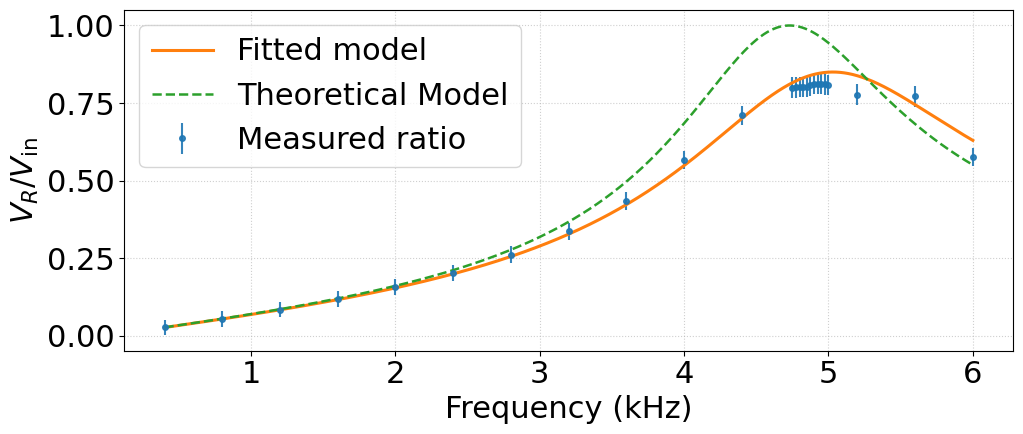

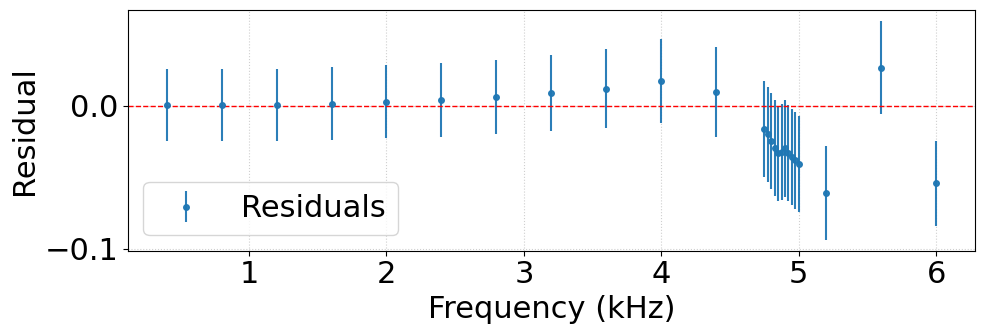


=== Theory (from measured L,R,C) ===
f0_theory = 4,737.51 ± 200.31 Hz
Q_theory  = 3.163 ± 0.135


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utils import (
    freq_uncertainty,                 # (f_reading, lsb, ppm) -> (u_f, rel%)
    amplitude_ratio_uncertainty,      # (Vout, Vin, u_Vout, u_Vin) -> (R, u_R)
    combine_x_uncert_into_y,          # (f, u_f, model_f, params, u_y_from_volt) -> u_y_total
    meterman37xr_unc
)

# ===================== ASSUMPTIONS =====================
# df: DataFrame with columns 'V_r / v_in' and 'Output  Voltage (V)'
# input_volt: NumPy array (Vin per point), same length/order as df
assert 'df' in globals(), "DataFrame `df` must exist."
assert 'input_volt' in globals(), "`input_volt` must exist (NumPy array)."

# ===================== USER SETTINGS =====================
freq_kHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6], dtype=float)

# Scope vertical scales / offsets (scalars or arrays)
V_DIV_OUT, V_DIV_IN = 0.5, 0.5
DC_VOFFSET_OUT, DC_VOFFSET_IN = 0.0, 0.0

# Frequency readout resolution & timebase ppm
LSB_HZ       = 1.0
PPM_TIMEBASE = 50

# Theory band toggle
SHOW_THEORY_BAND = True
MC_SAMPLES_BAND  = 1500

# Nominal L, R, C (for theory) + meter strings
L0, R0, C0 = 114.0e-3, 1.073e3, 9.93e-9
L_str, R_str, C_str = "0.1140", "1073.0", "0.00000000993"

# Allow a tiny inter-channel gain mismatch in the FIT (not in theory)
ALLOW_GAIN_MISMATCH = True
A_BOUNDS = (0.85, 1.15)        # tweak if needed (e.g., (0.9, 1.1))

# ===================== Keysight vertical worst-case (we'll convert to 1σ) =====================
def keysight_unc(v_div, dc_vo=0.0):
    v_div = np.asarray(v_div, dtype=float)
    fs = 8.0 * v_div
    dc_vga_unc = np.where(v_div >= 0.01, 0.03, 0.04)
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1*v_div + 0.002 + 0.01*dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# ===================== RLC helpers =====================
def series_rlc_w0_Q(L, R, C):
    w0 = 1/np.sqrt(L*C); f0 = w0/(2*np.pi); Q = (w0*L)/R
    return w0, f0, Q

# Base (unscaled) amplitude ratio in ω
def amp_ratio_base(omega, w0, Q):
    x = (omega/w0) - (w0/omega)
    return 1.0 / np.sqrt(1.0 + (Q*x)**2)

# FIT model: with gain scale A (if enabled)
def amp_model_ratio_omega(omega, w0, Q, A=1.0):
    if ALLOW_GAIN_MISMATCH:
        return A * amp_ratio_base(omega, w0, Q)
    else:
        return amp_ratio_base(omega, w0, Q)

# Wrapper in f (Hz) for combine_x_uncert_into_y
def amp_model_ratio_f(f, w0, Q, A=1.0):
    return amp_model_ratio_omega(2*np.pi*np.asarray(f, float), w0, Q, A)

def _coerce_sigma_vector(sigma_like, yref):
    s = sigma_like
    if isinstance(s, (list, tuple)):
        s = s[0]
    elif isinstance(s, dict):
        for k in ("sigma", "u", "std", "stderr"):
            if k in s: s = s[k]; break
    s = np.asarray(s, dtype=float).ravel()
    if s.size == 1:
        s = np.full_like(yref, s.item(), dtype=float)
    elif s.size != yref.size:
        raise ValueError(f"sigma length {s.size} != data length {yref.size}")
    s = np.clip(s, 1e-12, np.inf)
    if not np.all(np.isfinite(s)):
        finite = np.isfinite(s); fill = np.nanmax(s[finite]) if np.any(finite) else 1.0
        s = np.where(finite, s, fill)
    return s

# ===================== Pull measured data from your DataFrame =====================
Amp_ratio= df['V_r / v_in']
Vout_series = df['Output  Voltage (V)']

ratio_meas  = np.asarray(Amp_ratio, dtype=float)
Vout_meas   = np.asarray(Vout_series, dtype=float)
input_volt  = np.asarray(input_volt, dtype=float)

f_Hz  = (np.asarray(freq_kHz, float) * 1e3)
omega = 2*np.pi*f_Hz
n     = len(ratio_meas)
assert all(arr.shape == (n,) for arr in [Vout_meas, input_volt, f_Hz]), "Lengths must match."

# ===================== Uncertainties =====================
# Convert worst-case vertical bound → 1σ (divide by √3)
uV_out_wc = keysight_unc(V_DIV_OUT, DC_VOFFSET_OUT)
uV_in_wc  = keysight_unc(V_DIV_IN,  DC_VOFFSET_IN)
if np.isscalar(uV_out_wc): uV_out_wc = np.full(n, uV_out_wc, dtype=float)
if np.isscalar(uV_in_wc):  uV_in_wc  = np.full(n, uV_in_wc,  dtype=float)
uV_out = uV_out_wc / np.sqrt(3.0)
uV_in  = uV_in_wc  / np.sqrt(3.0)

# Ratio uncertainty from channel voltages
R_check, u_ratio_volt = amplitude_ratio_uncertainty(Vout_meas, input_volt, uV_out, uV_in)
if not np.allclose(ratio_meas, R_check, rtol=5e-3, atol=5e-3):
    print("Note: DF ratio and Vout/Vin differ by >0.5% at some points. Using DF ratio for the fit.")
u_ratio_volt = _coerce_sigma_vector(u_ratio_volt, ratio_meas)

# ===================== Fit helpers =====================
def fit_with_sigma(sigma):
    sigma = _coerce_sigma_vector(sigma, ratio_meas)
    _, f0_th, Q_th = series_rlc_w0_Q(L0, R0, C0)

    if ALLOW_GAIN_MISMATCH:
        p0      = [2*np.pi*f0_th, max(0.2, Q_th), 1.0]          # (w0, Q, A)
        boundsL = [2*np.pi*0.2*f0_th, 0.05, A_BOUNDS[0]]
        boundsU = [2*np.pi*5.0*f0_th, 500.0, A_BOUNDS[1]]
    else:
        p0      = [2*np.pi*f0_th, max(0.2, Q_th)]               # (w0, Q)
        boundsL = [2*np.pi*0.2*f0_th, 0.05]
        boundsU = [2*np.pi*5.0*f0_th, 500.0]

    params, cov = curve_fit(
        amp_model_ratio_omega, omega, ratio_meas,
        p0=p0, bounds=(boundsL, boundsU),
        sigma=sigma, absolute_sigma=True, maxfev=200000
    )
    fit_vals = amp_model_ratio_omega(omega, *params)
    res_std  = (ratio_meas - fit_vals)/sigma
    chi2     = float(np.sum(res_std**2))
    dof      = int(n - len(params))
    return params, cov, fit_vals, chi2, dof

# ===== First pass (voltage σ only)
params1, cov1, ratio_fit_1, chi2_1, dof_1 = fit_with_sigma(u_ratio_volt)
if ALLOW_GAIN_MISMATCH:
    w0_fit_1, Q_fit_1, A_fit_1 = params1
else:
    w0_fit_1, Q_fit_1 = params1; A_fit_1 = 1.0

# ===== Add frequency σ and recompute total σ
u_f, _ = freq_uncertainty(f_Hz, lsb=np.full_like(f_Hz, LSB_HZ), ppm=PPM_TIMEBASE)
u_ratio_total = combine_x_uncert_into_y(
    f_Hz, u_f, amp_model_ratio_f, (w0_fit_1, Q_fit_1, A_fit_1), u_ratio_volt
)
u_ratio_total = _coerce_sigma_vector(u_ratio_total, ratio_meas)

# ===== Final fit with total σ
params, cov, ratio_fit, chi2, dof = fit_with_sigma(u_ratio_total)
if ALLOW_GAIN_MISMATCH:
    w0_fit, Q_fit, A_fit = params
    perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan]*3)
else:
    w0_fit, Q_fit = params
    A_fit = 1.0
    perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan]*2)
chi2r = chi2/dof if dof > 0 else np.nan

print("\n=== Amplitude Ratio Fit (Series RLC) ===")
print(f"f0 = {w0_fit/(2*np.pi):.2f} ± {perr[0]/(2*np.pi):.2f} Hz")
print(f"Q  = {Q_fit:.3g} ± {perr[1]:.3g}")
if ALLOW_GAIN_MISMATCH:
    print(f"A  = {A_fit:.4f} ± {perr[2]:.4f}  (inter-channel scale)")
print(f"chi^2 = {chi2:.2f}, DOF = {dof}, reduced chi^2 = {chi2r:.2f}")

# ===================== Theory overlay (+ meter band) =====================
uL = meterman37xr_unc(L_str, mode="I")
uR = meterman37xr_unc(R_str, mode="R")
uC = meterman37xr_unc(C_str, mode="C")

# ===== Pretty-print the meter readings with uncertainties (1σ) =====
L_val = float(L_str)  # H
R_val = float(R_str)  # Ω
C_val = float(C_str)  # F

def _fmt(val, u, unit):
    rel = (u/val)*100.0 if val != 0 else np.nan
    return f"{val:.6g} {unit} ± {u:.3g} {unit} ({rel:.2f}%)"

print("\n=== Metered component values (1σ) ===")
print("L =", _fmt(L_val, uL, "H"))
print("R =", _fmt(R_val, uR, "Ω"))
print("C =", _fmt(C_val, uC, "F"))
# ===== Pretty-print the meter readings with uncertainties (1σ) =====
L_val = float(L_str)  # H
R_val = float(R_str)  # Ω
C_val = float(C_str)  # F

def _fmt(val, u, unit):
    rel = (u/val)*100.0 if val != 0 else np.nan
    return f"{val:.6g} {unit} ± {u:.3g} {unit} ({rel:.2f}%)"

print("\n=== Metered component values (1σ) ===")
print("L =", _fmt(L_val, uL, "H"))
print("R =", _fmt(R_val, uR, "Ω"))
print("C =", _fmt(C_val, uC, "F"))

print("inductor", L_str, uL)
print( "resistor", R_str, uR)
print("capacitor", C_str, uC)

f_dense  = np.linspace(f_Hz.min(), f_Hz.max(), 1200)
omega_d  = 2*np.pi*f_dense
_, f0_th, Q_th = series_rlc_w0_Q(L0, R0, C0)
ratio_th = amp_ratio_base(omega_d, 2*np.pi*f0_th, Q_th)   # theory has no gain fudge

th_lo = th_hi = None
if SHOW_THEORY_BAND:
    rng = np.random.default_rng(1234)
    L_s = rng.normal(L0, uL, size=MC_SAMPLES_BAND)
    R_s = rng.normal(R0, uR, size=MC_SAMPLES_BAND)
    C_s = rng.normal(C0, uC, size=MC_SAMPLES_BAND)
    sims = []
    for Li, Ri, Ci in zip(L_s, R_s, C_s):
        if Li <= 0 or Ri <= 0 or Ci <= 0: continue
        w0i, _, Qi = series_rlc_w0_Q(Li, Ri, Ci)
        sims.append(amp_ratio_base(omega_d, w0i, Qi))
    sims  = np.array(sims)
    th_lo = np.percentile(sims, 16, axis=0)
    th_hi = np.percentile(sims, 84, axis=0)

# ===================== Table (optional) =====================
out_df = pd.DataFrame({
    "Freq_kHz": freq_kHz,
    "Vout_V": Vout_meas,
    "Vin_V": input_volt,
    "Measured_Ratio_DF": ratio_meas,
    "R_from_V": R_check,
    "u_ratio_volt": u_ratio_volt,
    "u_ratio_total": u_ratio_total,
})

# ===================== PLOTS =====================
plt.figure(figsize=(10.5, 4.8))
plt.errorbar(f_Hz/1e3, ratio_meas, yerr=u_ratio_total, fmt='o', ms=4, alpha=0.9, label="Measured ratio")
plt.plot(f_dense/1e3, amp_model_ratio_omega(omega_d, w0_fit, Q_fit, A_fit), lw=2.2, label="Fitted model")
plt.plot(f_dense/1e3, ratio_th, ls='--', lw=1.8, label="Theoretical Model")

plt.xlabel("Frequency (kHz)")
plt.ylabel(r"$V_R/V_{\mathrm{in}}$")

plt.grid(True, ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10.5, 3.8))
residuals = ratio_meas - amp_model_ratio_omega(omega, w0_fit, Q_fit, A_fit)
plt.errorbar(f_Hz/1e3, residuals, yerr=u_ratio_total, fmt='o', ms=4, alpha=0.95, label="Residuals")
plt.axhline(0, color='r', lw=1, ls='--')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Residual")

plt.grid(True, ls=":", alpha=0.6)
plt.legend(loc ='lower left')
plt.tight_layout()
plt.show()

# --- Theoretical f0 and Q with simple uncertainty propagation (1σ) ---
L_meas, uL = 0.114, 0.009           # H
C_meas, uC = 9.9e-9, 0.3e-9         # F
R_meas, uR = 1073.0, 6.0            # ohm

import numpy as np
w0_th = 1.0/np.sqrt(L_meas*C_meas)
f0_th = w0_th/(2*np.pi)
Q_th  = (w0_th*L_meas)/R_meas       # same as (1/R)*sqrt(L/C)

# Relative-σ propagation:
rel_f0 = 0.5*np.sqrt( (uL/L_meas)**2 + (uC/C_meas)**2 )
u_f0   = f0_th * rel_f0

rel_Q  = np.sqrt( (0.5*uL/L_meas)**2 + (0.5*uC/C_meas)**2 + (uR/R_meas)**2 )
u_Q    = Q_th * rel_Q

print("\n=== Theory (from measured L,R,C) ===")
print(f"f0_theory = {f0_th:,.2f} ± {u_f0:,.2f} Hz")
print(f"Q_theory  = {Q_th:.3f} ± {u_Q:.3f}")




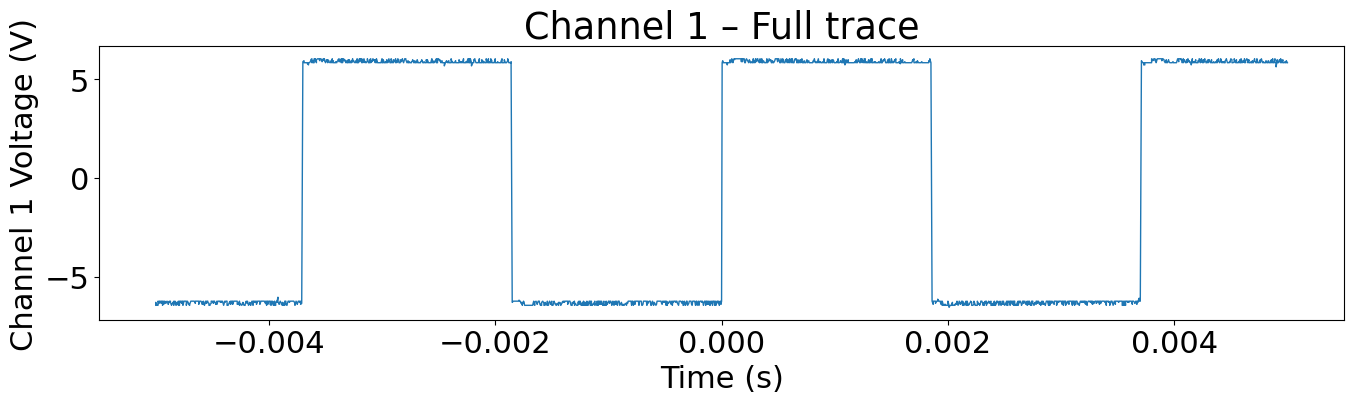

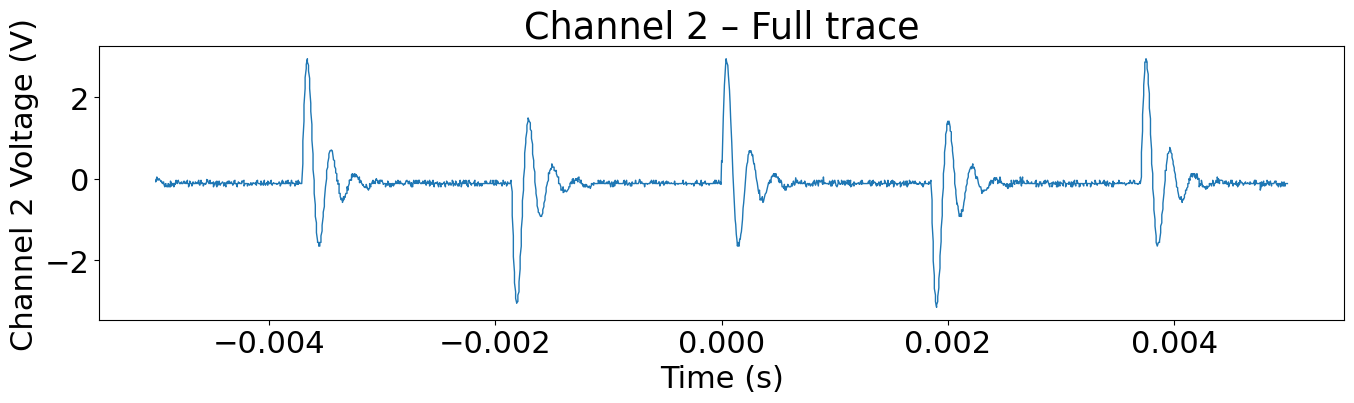

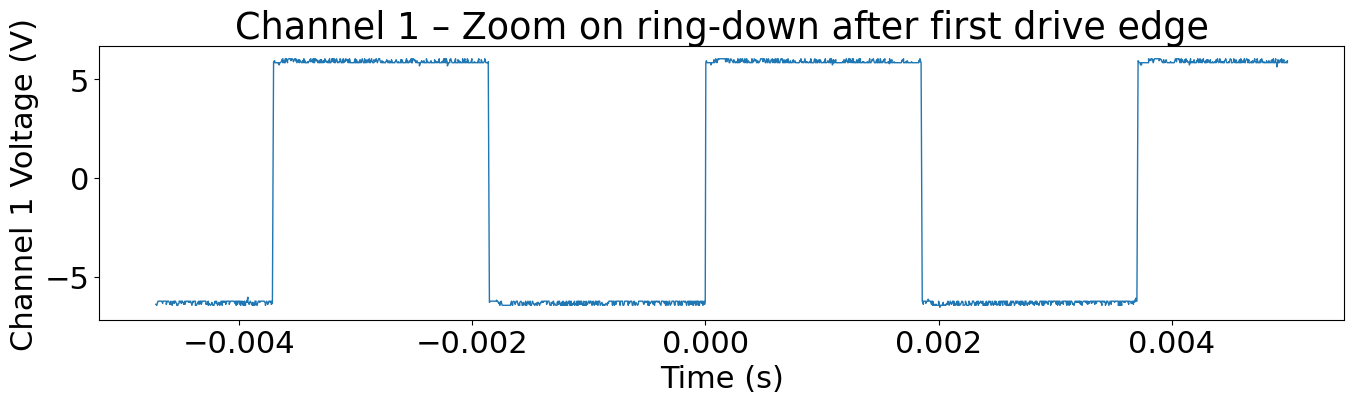

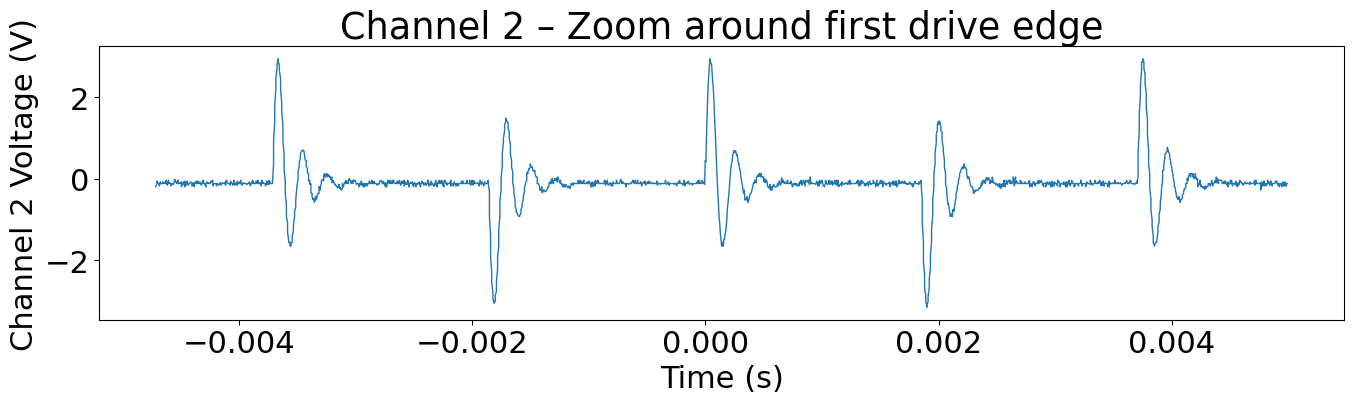

In [18]:


# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_0.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')  # coerce sci-notation strings like '+4.31E-02'
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # your "Measured" channel in the screenshot
ch2 = data['2'].to_numpy()   # your other scope channel (often the drive)

# Optional: strip DC offsets for visual clarity
ch1_dc = ch1 - np.nanmean(ch1)
ch2_dc = ch2 - np.nanmean(ch2)

# --- 2) Plot each channel individually (full record) ---
plt.figure(figsize=(14,4.5))
plt.plot(t, ch1, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Voltage (V)")
plt.title("Channel 1 – Full trace")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,4.5))
plt.plot(t, ch2, linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Channel 2 Voltage (V)")
plt.title("Channel 2 – Full trace")
plt.tight_layout()
plt.show()

# --- 3) Zoom around the first rising edge in CH2 to see ring-down on CH1 ---
# We’ll detect a rising edge on CH2 using a simple derivative threshold.
# (This assumes CH2 is the square-wave drive; if not, you can swap channels.)
d2 = np.diff(ch2_dc)
# Use an adaptive threshold: several standard deviations of the derivative
thr = 3*np.nanstd(d2)
edge_idx_candidates = np.where(d2 > thr)[0]

if edge_idx_candidates.size > 0:
    i0 = edge_idx_candidates[0]           # first detected rising edge
    # choose a zoom window around that edge (t0- a little before, to t0 + some ms)
    pre  = 200   # samples before edge to include
    post = 2000  # samples after edge to include (adjust if needed)
    a = max(0, i0 - pre)
    b = min(len(t)-1, i0 + post)

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch1[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 1 Voltage (V)")
    plt.title("Channel 1 – Zoom on ring-down after first drive edge")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14,4.5))
    plt.plot(t[a:b], ch2[a:b], linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel 2 Voltage (V)")
    plt.title("Channel 2 – Zoom around first drive edge")
    plt.tight_layout()
    plt.show()
else:
    print("No clear rising edge detected on Channel 2. Try lowering 'thr' or swap channels for edge detection.")

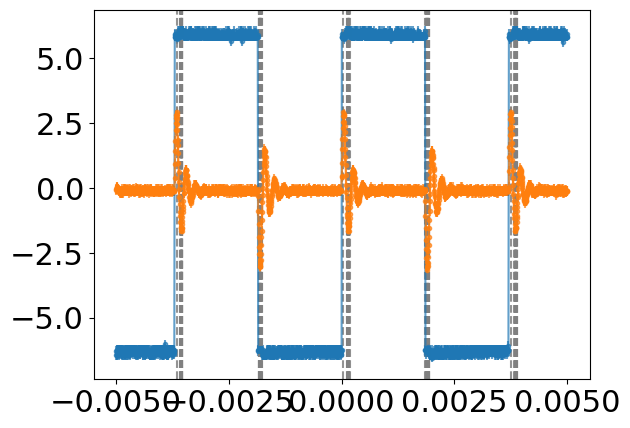

In [19]:
from utils import keysight_unc

v_div = 0.5 # 500mV/div 
vu = keysight_unc(v_div) * np.ones(t.shape)
vu[0]

indices = np.where((ch2 > 2.9) | (ch2 < -1.0))[0]
indices = np.append(indices, len(ch1) - 1)
t[indices]

ch1ch = np.mean(ch1[(indices[1] - 21):(indices[1] - 1)])
ch2ch = np.mean(ch2[(indices[1] - 21):(indices[1] - 1)])

ch2h = np.mean(ch1[indices[0]:indices[1]] + ch2[indices[0]:indices[1]])
ch2h, ch1ch, ch2ch

plt.errorbar(t, ch1, label=r"$V_R$", yerr=vu, marker='.', alpha=0.7)
plt.errorbar(t, ch2, label=r"$V_C$", yerr=vu, marker='.', alpha=0.7)

for idx in indices[:-1]:
    plt.axvline(x=t[idx], color='gray', linestyle='--', alpha=0.85)


In [20]:
# ============================
# Better Underdamped LCR Fit
# ============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.optimize import curve_fit

from utils import keysight_unc  # <-- keep your function

# ---- 1) Load data ----
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')

t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # drive (square wave)
#ch2 = data['2'].to_numpy()   # response (oscillation)

# ---- 2) Find first rising edge (as you did) ----
d1  = np.diff(ch1 - np.nanmean(ch1))
thr = 3 * np.nanstd(d1)
edge_idx = np.where(d1 > thr)[0]
if edge_idx.size == 0:
    raise RuntimeError("No rising edge found on the drive channel.")
i0 = edge_idx[0]

# ---- 3) Window: skip early-edge distortion, fit the clean tail ----
fs       = 1.0 / np.median(np.diff(t))      # sampling rate (Hz)
t_skip   = 0.00020                          # 0.20 ms after the edge (adjust 0.15–0.30 ms if needed)
posttime = 0.00160                          # total length of the fit window after the edge

a = int(i0 + t_skip*fs)
b = int(i0 + posttime*fs)
a = max(a, 0); b = min(b, len(t))

tt = t[a:b] - t[a]                          # time starts at 0 in window
yy = ch2[a:b].copy()                        # raw response in window

# ---- 4) Remove small baseline (mean of last quiet part) ----
tail = slice(max(0, len(yy) - 250), max(10, len(yy) - 20))  # quiet region near end
baseline = np.mean(yy[tail])
yy -= baseline

# ---- 5) Initial guesses from FFT + Hilbert envelope ----
# Frequency guess
Y  = np.fft.rfft(yy)
f  = np.fft.rfftfreq(len(yy), d=1/fs)
idxpk = 1 + np.argmax(np.abs(Y[1:]))       # ignore DC
f0   = float(f[idxpk]) if np.isfinite(f[idxpk]) else 5_000.0
w0   = 2*np.pi*f0

# Tau guess from envelope slope
z   = hilbert(yy)
E   = np.abs(z)
# Avoid log(0)
Eh  = np.clip(E, 1e-9, None)
m, b_lin = np.polyfit(tt, np.log(Eh), 1)
tau0 = max(5e-4, min(0.5, abs(-1.0/m)))     # clamp to 0.5 ms – 0.5 s

# Amplitude-ish guess
A0  = 0.5*(np.max(yy) - np.min(yy))
# Reparameterize: y = exp(-t/tau)[B cos wt + D sin wt] + C
B0, D0, C0 = A0, 0.0, 0.0

# ---- 6) Build realistic uncertainties (Keysight + noise) for this window ----
# IMPORTANT: set your vertical scale in the UNITS expected by keysight_unc.
# Example: if your scope was at 500 mV/div and keysight_unc expects V/div:
v_div = 0.5       # V/div   (if your function expects mV/div, use v_div = 500)
sigma_scope = float(keysight_unc(v_div)) / 10.0
 # scalar

# after getting y_fit:
#residuals = yy - y_fit

# Option 1: residual-based SD (simple)
sigma_noise = float(np.std(residuals))  # random part measured from the quiet tail
sigma_win = float(np.hypot(sigma_scope, sigma_noise))
vu_win = np.full_like(tt, sigma_win)
# refit with curve_fit(..., sigma=vu_win, absolute_sigma=True)


# ---- 7) Re-parameterized model + tight bounds ----
def model_BD(t, B, D, tau, omega, C):
    return np.exp(-t/tau)*(B*np.cos(omega*t) + D*np.sin(omega*t)) + C

# Keep bounds informed by our guesses (prevents wandering solutions)
low  = [-5*A0, -5*A0, 0.3*tau0, 2*np.pi*0.7*f0, -2.0]
high = [ 5*A0,  5*A0, 3.0*tau0, 2*np.pi*1.4*f0,  2.0]
p0   = [B0, D0, tau0, w0, C0]

# ---- 8) Weighted fit with absolute σ ----
params, cov = curve_fit(
    model_BD, tt, yy, p0=p0, bounds=(low, high),
    sigma=vu_win, absolute_sigma=True, maxfev=80000
)
B, D, tau, omega, C = params
perr = np.sqrt(np.diag(cov))

# Convert back to A and phi
A   = np.hypot(B, D)
phi = np.arctan2(-D, B)

fd  = omega/(2*np.pi)
Q   = (omega * tau) / 2

# Uncertainty propagation for A and phi
# (approximate, from covariance of [B, D])
varA  = (B/A)**2 * cov[0,0] + (D/A)**2 * cov[1,1] + 2*(B*D/A**2)*cov[0,1]
Aerr  = np.sqrt(max(varA, 0.0))
# phi = atan2(-D, B) → dphi = sqrt( (∂φ/∂B)^2 Var(B) + (∂φ/∂D)^2 Var(D) + 2 ∂φ/∂B ∂φ/∂D Cov(B,D) )
dphi_dB =  D / (A**2)
dphi_dD =  B / (A**2)
varphi  = dphi_dB**2*cov[0,0] + dphi_dD**2*cov[1,1] + 2*dphi_dB*dphi_dD*cov[0,1]
phierr  = np.sqrt(max(varphi, 0.0))

# Propagate to Q: Q = (omega*tau)/2
Qerr = 0.5*np.sqrt( (tau**2)*cov[3,3] + (omega**2)*cov[2,2] + 2*tau*omega*cov[2,3] )

# ---- 9) Goodness-of-fit (χ² and reduced χ²) ----
y_fit = model_BD(tt, *params)
res   = (yy - y_fit) / sigma_win
chi2  = np.sum(res**2)
dof   = len(yy) - len(params)
chi2r = chi2 / dof

# ---- 10) Report ----
print("\n=== Weighted Fit (re-parameterized) ===")
print(f"A      = {A:.4f} V ± {Aerr:.3g}")
print(f"phi    = {phi:.4f} rad ± {phierr:.3g}")
print(f"tau    = {tau*1e3:.3f} ms ± {perr[2]*1e3:.3g}")
print(f"omega  = {omega:.1f} rad/s  (f = {fd:.1f} Hz) ± {(perr[3]/(2*np.pi)):.1f} Hz")
print(f"C      = {C:.4f} V ± {perr[4]:.3g}")
print(f"Q      = {Q:.2f} ± {Qerr:.2f}")
print(f"sigma_scope = {sigma_scope:.4g} V, sigma_noise = {sigma_noise:.4g} V, sigma_total = {sigma_win:.4g} V")
print(f"chi² = {chi2:.2f},  dof = {dof},  reduced chi² = {chi2r:.2f}")



ValueError: attempt to get argmax of an empty sequence

NameError: name 'vu_win' is not defined

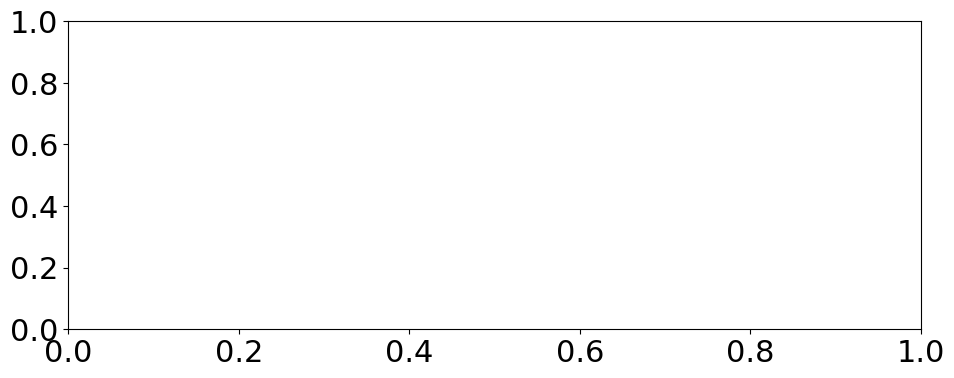

In [ ]:
# ---- 11) Plot: data, fit, and residuals ----
fig = plt.figure(figsize=(11,6))
gs  = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.25)

ax = fig.add_subplot(gs[0,0])
ax.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
ax.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
ax.set_xlabel("Time since drive edge (s)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Underdamped LCR")
ax.legend()
ax.grid(True, ls=':', alpha=0.6)

ax2 = fig.add_subplot(gs[1,0], sharex=ax)
ax2.plot(tt, (yy - y_fit), '.', ms=3, alpha=0.8)
ax2.axhline(0, color='k', lw=1)
ax2.set_ylabel("Residual (V)")
ax2.set_xlabel("Time since drive edge (s)")
ax2.grid(True, ls=':', alpha=0.6)

plt.tight_layout()
plt.show()

# ---------- Plot 1: Data + Fit ----------
plt.figure(figsize=(11,5))
plt.errorbar(tt, yy, yerr=vu_win, fmt='.', ms=3, alpha=0.7, label='Measured')
plt.plot(tt, y_fit, 'r-', lw=2, label='Fitted model')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Underdamped LCR")
plt.legend()
plt.grid(True, ls=':', alpha=0.6)
plt.tight_layout()
plt.show()

# ---------- Plot 2: Residuals (separate figure, WITH error bars) ----------
residuals = yy - y_fit

plt.figure(figsize=(11,4))
plt.errorbar(tt, residuals, yerr=vu_win, fmt='.', ms=3, alpha=0.7, color='steelblue', label='Residuals')
plt.axhline(0, color='red', lw=1, linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Residual (V)")

plt.grid(True, ls=':', alpha=0.9)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
from utils import meterman37xr_unc

# constants
L = 114.0e-3  # H
R = 1.073e3   # ohm
C = 9.93e-9   # F
Vin = 4.316   # V

inductor_unc = meterman37xr_unc("114.0", "I")
resistor_unc = meterman37xr_unc("1073", "R")
capacitor_unc = meterman37xr_unc("9.93", "C")
battery_unc = meterman37xr_unc("4.316", "V")

# User's measured data
measured = np.array([4.316,4.316,4.317,4.316,4.313,4.309,4.302,4.291,4.271,4.239,
                     4.194,4.162,4.161,4.160,4.159,4.158,4.158,4.1571,4.1575,4.1565,
                     4.1570,4.1575,4.169,4.201,4.231])

# Frequency list (MHz → kHz → Hz)
freq_MHz = np.array([0.4,0.8,1.2,1.6,2,2.4,2.8,3.2,3.6,4,4.4,4.75,4.775,4.8,4.825,
                     4.85,4.875,4.9,4.925,4.95,4.975,5,5.2,5.6,6])
freq_Hz = freq_MHz * 1000  # convert kHz to Hz

# Measured amplitude ratio
#measured_ratio = measured / Vin

# Theoretical amplitude ratio
omega = 2 * np.pi * freq_Hz
H_theoretical = R / np.sqrt(R**2 + (omega * L - 1/(omega * C))**2)

# Create comparison dataframe
df = pd.DataFrame({
    "Freq_kHz": freq_MHz,
    "V_measured_V": output_volt,
    "Measured_Ratio_ch1/Vin": np.round(amplitude, 6),
    "Theoretical_Ratio": np.round(H_theoretical, 6)
})

# Save CSV
#outfile = "/mnt/data/theoretical_vs_measured_ratio_exact_freq.csv"
#df.to_csv(outfile, index=False)


plt.figure(figsize=(12,6))
plt.plot(freq_MHz, H_theoretical, label="Theoretical", linewidth=2)
plt.plot(values_list, amplitude,label="Measured Data", linewidth=2)
#plt.show()
plt.scatter(freq_MHz, amplitude, color="red", s=35, label="Measured")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude Ratio $V_R/V_{in}$")
plt.title("Measured vs Theoretical Amplitude Ratio (Series LCR)")
plt.legend()
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()

#plot_path = "/mnt/data/measured_vs_theoretical_plot.png"
#plt.savefig(plot_path, dpi=150)
plt.show()

#df.head(10), outfile, plot_path

Estimated natural frequency f0 ≈ 75.2762 Hz
Decay constant gamma ≈ 2.01894 1/s  (± 0.03029)
Amplitude relaxation time tau = 1/gamma ≈ 0.49531 s  (± 0.00743)
Estimated Q ≈ 117.13


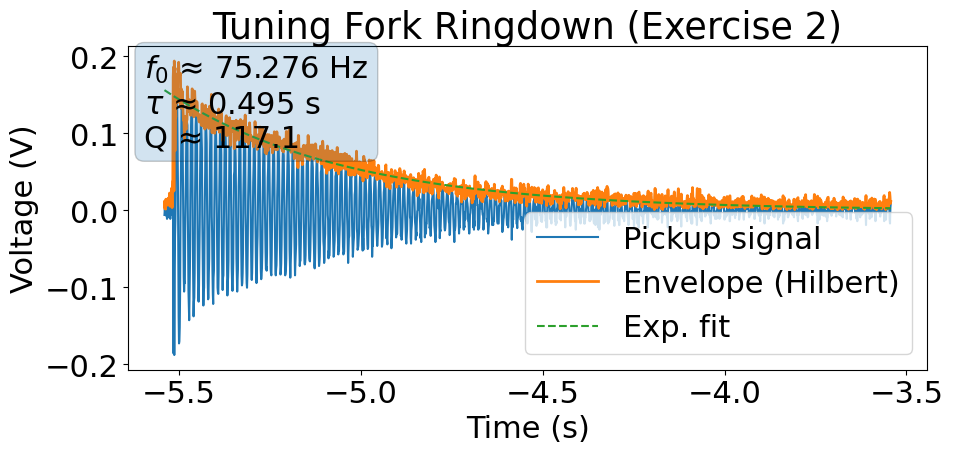

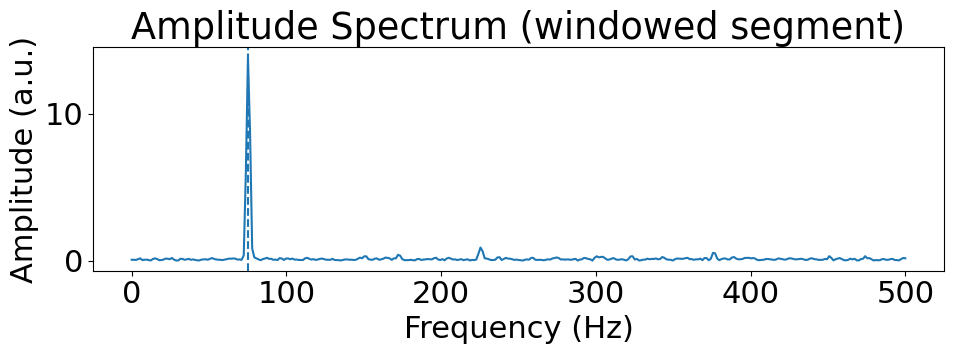

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====== Tunables: set to your scope settings ======
VDIV_CH1    = 0.02   # volts/div for CH1 (e.g., 20 mV/div -> 0.02)
DC_VOFFSET  = 0.0    # vertical offset in volts (if any)
ERRBAR_STEP = 10     # decimation for plotting error bars
# ===================================================

def keysight_unc(v_div, dc_vo=0.0):
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa


# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 2) Parse numeric columns you need ---
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')  # coerce sci-notation strings like '+4.31E-02'
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()   # your pickup-coil channel for the fork ringdown

# --- 3) Basic cleanup: drop NaNs, sort by time, and zero-mean the signal ---
m = np.isfinite(t) & np.isfinite(ch1)
t   = t[m]
ch1 = ch1[m]
order = np.argsort(t)
t   = t[order]
ch1 = ch1[order]
ch1 = ch1 - np.median(ch1)

# --- 4) Helper: safe Hilbert envelope without SciPy (FFT-based analytic signal) ---
def analytic_signal(x):
    """Return the analytic signal (Hilbert transform) via FFT; no scipy needed."""
    N = x.size
    Xf = np.fft.fft(x)
    h = np.zeros(N)
    if N % 2 == 0:
        h[0] = 1
        h[N//2] = 1
        h[1:N//2] = 2
    else:
        h[0] = 1
        h[1:(N+1)//2] = 2
    return np.fft.ifft(Xf * h)

env = np.abs(analytic_signal(ch1))

# --- 5) Choose a fitting window for the exponential decay (avoid the tail/noise floor) ---
# Use a data-driven cutoff: keep samples where envelope is above (noise_floor + margin)
# Noise floor ≈ median of last 20% of the record
tail = env[int(0.8*len(env)):]
noise_floor = np.median(tail)
margin = 3.0 * np.median(np.abs(tail - noise_floor) + 1e-15)  # robust margin
keep = env > (noise_floor + margin)

# Also require time to be within the main ringing (exclude first few points to avoid shock)
if keep.sum() < 10:
    # fallback: take top 60% of envelope by value
    thr = np.percentile(env, 40)
    keep = env >= thr

# Contiguous window around the max envelope
imax = int(np.argmax(env))
# expand left/right while keep is True
L = imax
while L > 0 and keep[L-1]:
    L -= 1
R = imax
while R < len(env)-1 and keep[R+1]:
    R += 1

t_fit = t[L:R+1]
e_fit = env[L:R+1]

# --- 6) Fit exponential envelope:  env(t) ≈ A * exp(-gamma * t) ---
# Linearize: ln(env) = ln(A) - gamma * t
# Use only positive envelope values
mask_pos = e_fit > 0
t_fit_lin = t_fit[mask_pos]
y_fit_lin = np.log(e_fit[mask_pos])

# Robust detrend of time to improve conditioning
t0 = t_fit_lin[0]
p = np.polyfit(t_fit_lin - t0, y_fit_lin, 1)  # slope, intercept in shifted time
slope, intercept = p[0], p[1]
gamma = -slope
A_env = np.exp(intercept)

# Uncertainties from linear fit residuals
y_pred = np.polyval(p, t_fit_lin - t0)
resid = y_fit_lin - y_pred
dof = max(len(y_fit_lin) - 2, 1)
s2 = np.sum(resid**2) / dof
Sxx = np.sum((t_fit_lin - t0 - np.mean(t_fit_lin - t0))**2)
gamma_std = np.sqrt(s2 / Sxx)
tau = 1.0 / gamma if gamma > 0 else np.nan
tau_std = gamma_std / (gamma**2) if gamma > 0 else np.nan

# --- 7) Estimate natural frequency f0 from spectrum (FFT of detrended window) ---
# Use the same window used for decay fit for a clean estimate
x_win = ch1[L:R+1]
t_win = t[L:R+1]
dt = np.median(np.diff(t_win))
# Hann window to limit leakage
w = 0.5 - 0.5*np.cos(2*np.pi*np.arange(x_win.size)/x_win.size)
xw = (x_win - np.mean(x_win)) * w
X = np.fft.rfft(xw)
freq = np.fft.rfftfreq(xw.size, d=dt)
amp = np.abs(X)

# Find peak frequency ignoring DC
peak_idx = np.argmax(amp[1:]) + 1 if amp.size > 1 else 0
f0 = freq[peak_idx] if peak_idx < freq.size else np.nan

# Very rough frequency uncertainty from local curvature (parabolic interp around peak)
if 1 <= peak_idx <= len(amp)-2:
    y0, y1, y2 = amp[peak_idx-1], amp[peak_idx], amp[peak_idx+1]
    denom = (y0 - 2*y1 + y2)
    if denom != 0:
        delta = 0.5*(y0 - y2)/denom  # fractional bin shift
        f0 += delta * (freq[1]-freq[0])

# --- 8) Derived quantity (optional): Q ≈ π f0 τ for lightly damped oscillator ---
Q = np.pi * f0 * tau if np.isfinite(f0) and np.isfinite(tau) else np.nan

# --- 9) Build fitted envelope for plotting across the whole record ---
env_fit_full = A_env * np.exp(-gamma * (t - t0))

# --- 10) Plots: ringdown with envelope+fit, and spectrum with peak marker ---
plt.figure(figsize=(10, 5))
plt.plot(t, ch1, label='Pickup signal')
plt.plot(t, env, label='Envelope (Hilbert)', linewidth=2)
plt.plot(t, env_fit_full, linestyle='--', label='Exp. fit')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Tuning Fork Ringdown (Exercise 2)')
txt = (f"$f_0$ ≈ {f0:0.3f} Hz\n"
       f"$\\tau$ ≈ {tau:0.3f} s"
       + (f"\nQ ≈ {Q:0.1f}" if np.isfinite(Q) else ""))
plt.annotate(txt, xy=(0.02, 0.98), xycoords='axes fraction',
             va='top', ha='left', bbox=dict(boxstyle='round', alpha=0.2))
plt.legend()
plt.tight_layout()

plt.figure(figsize=(10, 4))
plt.plot(freq, amp)
if np.isfinite(f0):
    plt.axvline(f0, linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Amplitude Spectrum (windowed segment)')
plt.tight_layout()

# If you want the numeric results printed to console too:
print(f"Estimated natural frequency f0 ≈ {f0:.4f} Hz")
print(f"Decay constant gamma ≈ {gamma:.5f} 1/s  (± {gamma_std:.5f})")
print(f"Amplitude relaxation time tau = 1/gamma ≈ {tau:.5f} s  (± {tau_std:.5f})")
print(f"Estimated Q ≈ {Q:.2f}")



In [ ]:
# --- 8) Improved variable-projection fit with chirp + quadratic drift
# Model:
# y(t) = e^{-(t-t0)/tau} [ C cos(θ(t)) + S sin(θ(t)) ] + (B0 + B1 t + B2 t^2)
# where θ(t) = w*(t-t0) + 0.5*alpha*(t-t0)^2

t0 = t[0]

def solve_lin_with_chirp_drift(tau, w, alpha, t, y):
    tt = (t - t0)
    E = np.exp(-tt / tau)
    theta = w*tt + 0.5*alpha*(tt**2)
    cth, sth = np.cos(theta), np.sin(theta)

    # Linear block (C,S,B0,B1,B2)
    Phi = np.column_stack([
        E*cth,           # C
        E*sth,           # S
        np.ones_like(t), # B0
        t,               # B1
        t**2             # B2
    ])
    theta_lin, *_ = np.linalg.lstsq(Phi, y, rcond=None)
    yhat = Phi @ theta_lin
    resid = y - yhat
    sse = float(resid @ resid)
    return theta_lin, yhat, resid, sse

def refine_tau_w_alpha(tau_seed, w_seed, alpha_seed, t, y):
    tau_best, w_best, a_best = tau_seed, w_seed, alpha_seed
    th_best, yhat_best, resid_best, sse_best = solve_lin_with_chirp_drift(tau_best, w_best, a_best, t, y)

    # Coarse -> fine zooms around (tau, w, alpha)
    # (tau span, w frac span, alpha frac span, grid points)
    zooms = [
        (4.0,  0.20, 0.50, 21),
        (2.0,  0.08, 0.25, 25),
        (1.5,  0.03, 0.12, 31),
        (1.15, 0.012,0.05, 35)
    ]
    for tau_span, w_frac, a_frac, n in zooms:
        # tau grid (logspace)
        tau_lo = max(tau_best / tau_span, 1e-9)
        tau_hi = max(tau_best * tau_span, tau_lo*1.001)
        tau_grid = np.logspace(np.log10(tau_lo), np.log10(tau_hi), n)

        # w grid (linear fractional)
        w_grid = np.linspace(w_best*(1 - w_frac), w_best*(1 + w_frac), n)

        # alpha grid (linear fractional; allow sign change by widening if near zero)
        a_scale = abs(a_best) if abs(a_best) > 1e-12 else (2*np.pi*(f0+1e-12)/(t[-1]-t[0]+1e-12))
        a_grid = np.linspace(a_best - a_frac*a_scale, a_best + a_frac*a_scale, n)

        sse_min = np.inf
        best = None
        for tau_g in tau_grid:
            tt = (t - t0)
            Epre = np.exp(-tt / tau_g)  # small speed-up
            for w_g in w_grid:
                # precompute θ except alpha term; keep it simple/readable instead
                for a_g in a_grid:
                    th_lin, yhat_g, resid_g, sse_g = solve_lin_with_chirp_drift(tau_g, w_g, a_g, t, y)
                    if sse_g < sse_min:
                        sse_min = sse_g
                        best = (tau_g, w_g, a_g, th_lin, yhat_g, resid_g)
        if best is not None and sse_min < sse_best:
            tau_best, w_best, a_best, th_best, yhat_best, resid_best = best
            sse_best = sse_min

    return tau_best, w_best, a_best, th_best, yhat_best, resid_best, sse_best

# --- 8a) Seed a tiny chirp from early vs late FFT (optional, robust)
def _peak_freq(x_seg, t_seg):
    dt = np.median(np.diff(t_seg))
    w_hann = 0.5 - 0.5*np.cos(2*np.pi*np.arange(x_seg.size)/x_seg.size)
    X = np.fft.rfft((x_seg - np.mean(x_seg))*w_hann)
    f = np.fft.rfftfreq(x_seg.size, d=dt); A = np.abs(X)
    if A.size < 3: 
        return np.nan
    k = np.argmax(A[1:]) + 1
    if 1 <= k <= len(A)-2:
        y0,y1,y2 = A[k-1],A[k],A[k+1]
        denom = (y0 - 2*y1 + y2)
        delta = 0.5*(y0 - y2)/denom if denom != 0 else 0.0
        return f[k] + delta*(f[1]-f[0])
    return f[k]

# pick a ringing window (we already have L..R)
mid = (L+R)//2
f_start = _peak_freq(y[L:mid+1], t[L:mid+1])
f_end   = _peak_freq(y[mid:R+1], t[mid:R+1])
alpha0 = 0.0
if np.isfinite(f_start) and np.isfinite(f_end) and (t[R]-t[L]) > 0:
    alpha0 = 2*np.pi*(f_end - f_start) / (t[R]-t[L])  # rad/s^2

# --- 9) Run refined fit (tau,w from steps 6–7; alpha from above)
tau, w, alpha, theta_lin, y_fit_full, resid_sig, sse = refine_tau_w_alpha(tau, w, alpha0, t, y)
C, S, B0, B1, B2 = theta_lin
A   = np.hypot(C, S)
phi = np.arctan2(-S, C)
f0  = w / (2*np.pi)
Q   = np.pi * f0 * tau if np.isfinite(f0) and np.isfinite(tau) else np.nan

# --- 10) Goodness of fit with σ = vu (worst-case)
vu = keysight_unc(VDIV_CH1, DC_VOFFSET)
N = len(y)
p = 8  # nonlinear: tau,w,alpha (3) + linear: C,S,B0,B1,B2 (5)
dof = max(N - p, 1)
if vu <= 0 or not np.isfinite(vu):
    raise ValueError("Non-positive/NaN vu. Check VDIV_CH1 and DC_VOFFSET.")
chi2 = np.sum((resid_sig / vu)**2)
chi2_red = chi2 / dof

print(f"Worst-case vertical uncertainty (vu): ±{vu:.6g} V")

# --- 11) Plots (fit + residuals with error bars)
idx = np.arange(0, len(t), ERRBAR_STEP)

plt.figure(figsize=(11,5.5))
plt.plot(t, y, label='Signal (zero-mean)', linewidth=1.2)
plt.plot(t, y_fit_full, '--', label='Fit: A e^{-(t-t0)/τ} cos(ωt + ½α(t-t0)^2 + φ) + B0 + B1 t + B2 t²')
plt.errorbar(t[idx], y[idx], yerr=vu, fmt='none', elinewidth=0.8, capsize=2, alpha=0.6,
             label=f'±vu error bars ({ERRBAR_STEP}x)')
plt.fill_between(t, y_fit_full - vu, y_fit_full + vu, alpha=0.15, label='±vu around fit')
plt.xlabel('Time (s)'); plt.ylabel('Voltage (V)')
plt.title('Underdamped Fit with Chirp + Quadratic Drift (lower χ²)')
plt.legend(); plt.tight_layout()

# Residuals plot
plt.figure(figsize=(11,3.8))
plt.axhline(0, linewidth=1.0)
plt.errorbar(t[idx], resid_sig[idx], yerr=vu, fmt='o', markersize=2.5, elinewidth=0.8, capsize=2, alpha=0.8,
             label='Residuals (decimated) ±vu')
plt.fill_between(t, -vu, +vu, alpha=0.15, label='±vu band')
plt.xlabel('Time (s)'); plt.ylabel('Residual (V)')
plt.title('Residuals with Error Bars')
plt.legend(); plt.tight_layout()

# --- 12) Report parameters and goodness-of-fit
print("=== Fitted Parameters (Underdamped + Chirp + Quadratic Drift) ===")
print(f"A (amplitude)        : {A:.6g} V")
print(f"tau (time constant)  : {tau:.6g} s")
print(f"f0 (center frequency): {f0:.6g} Hz")
print(f"ω (angular freq)     : {w:.6g} rad/s")
print(f"α (chirp rate)       : {alpha:.6g} rad/s^2")
print(f"φ (phase)            : {phi:.6g} rad")
print(f"B0 (offset)          : {B0:.6g} V")
print(f"B1 (linear drift)    : {B1:.6g} V/s")
print(f"B2 (quadratic drift) : {B2:.6g} V/s^2")
print(f"Q (≈ π f0 τ)         : {Q:.6g}")
print("=== Goodness of Fit ===")
print(f"N (samples)          : {N}")
print(f"p (parameters)       : {p}")
print(f"DOF                  : {dof}")
print(f"σ (assumed per-point): {vu:.6g} V")
print(f"χ²                   : {chi2:.6g}")
print(f"χ²_red               : {chi2_red:.6g}")


NameError: name 'y' is not defined

In [ ]:
# --- 8a) Chi-square, DOF, and reduced chi-square using constant sigma = vu ---
N = len(y)
p = 4  # parameters: A, tau, w, phi
dof = max(N - p, 1)

if vu <= 0 or not np.isfinite(vu):
    raise ValueError("Non-positive or NaN voltage uncertainty vu. Set VDIV_CH1/DC_VOFFSET correctly.")

chi2 = np.sum((resid / vu)**2)
chi2_red = chi2 / dof

print("=== Goodness of Fit (with constant σ = vu) ===")
print(f"N (samples)          : {N}")
print(f"p (parameters)       : {p}")
print(f"DOF                  : {dof}")
print(f"σ (assumed per-point): {vu:.6g} V  (Keysight worst-case)")
print(f"χ²                   : {chi2:.6g}")
print(f"χ²_red               : {chi2_red:.6g}")


NameError: name 'y' is not defined

=== Fitted Parameters (Underdamped, original) ===
A (amplitude)        : 0.139593 V
tau (time constant)  : 0.49531 s
f0 (frequency)       : 75.2762 Hz
ω (angular freq)     : 472.974 rad/s
φ (phase)            : 2.71535 rad
Q (≈ π f0 τ)         : 117.135
=== Goodness of Fit ===
N (samples)          : 1998
p (parameters)       : 4
DOF                  : 1994
σ (assumed per-point): 0.039125 V
χ²                   : 297.576
χ²_red               : 0.149236


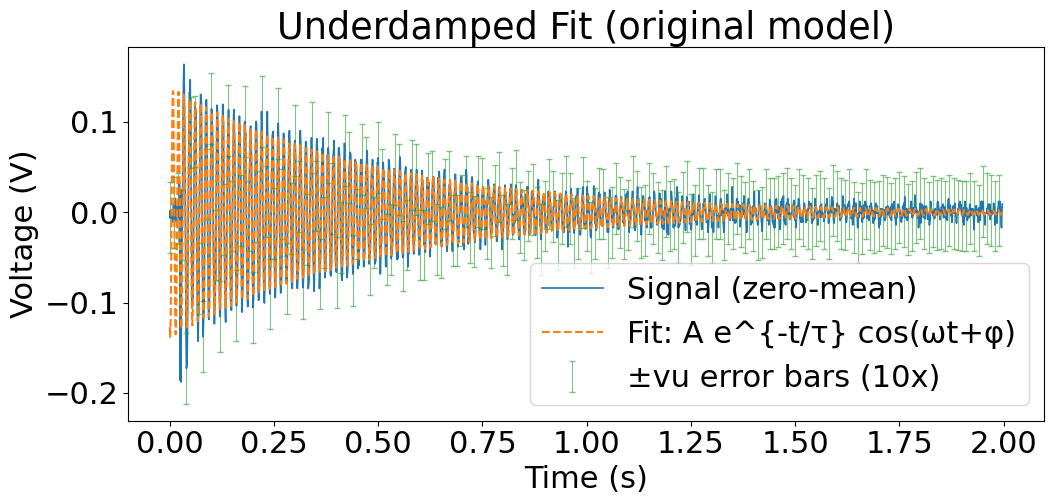

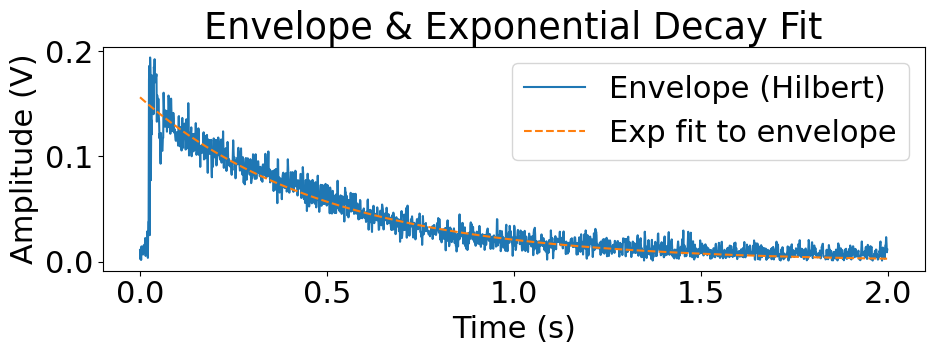

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ====== Tunables: set to your scope settings ======
VDIV_CH1    = 0.1  # volts/div for CH1 (e.g., 20 mV/div -> 0.02)
DC_VOFFSET  = 0.0   # vertical offset in volts (if any)
ERRBAR_STEP = 10    # decimation for plotting error bars
# ===================================================

def keysight_unc(v_div, dc_vo=0.0):
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

# --- 2) Parse numeric columns you need ---
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()

# --- 3) Cleanup: finite, sort, zero-mean, time-shift to 0 (for conditioning) ---
m = np.isfinite(t) & np.isfinite(ch1)
t, ch1 = t[m], ch1[m]
order = np.argsort(t)
t, ch1 = t[order], ch1[order]
t0 = t[0]
t = t - t0
y = ch1 - np.median(ch1)

# --- 4) Envelope via FFT-based Hilbert (no SciPy) ---
def analytic_signal(x):
    N = x.size
    Xf = np.fft.fft(x)
    h = np.zeros(N)
    if N % 2 == 0:
        h[0] = 1; h[N//2] = 1; h[1:N//2] = 2
    else:
        h[0] = 1; h[1:(N+1)//2] = 2
    return np.fft.ifft(Xf * h)

env = np.abs(analytic_signal(y))

# --- 5) Robust window around ringing to estimate initial τ and f0 ---
tail = env[int(0.8*len(env)):]
noise_floor = np.median(tail)
margin = 3.0 * np.median(np.abs(tail - noise_floor) + 1e-15)
keep_mask = env > (noise_floor + margin)
if keep_mask.sum() < 10:
    thr = np.percentile(env, 40)
    keep_mask = env >= thr

imax = int(np.argmax(env))
L = imax
while L > 0 and keep_mask[L-1]: L -= 1
R = imax
while R < len(env)-1 and keep_mask[R+1]: R += 1

t_win = t[L:R+1]
y_win = y[L:R+1]
env_win = env[L:R+1]

# τ guess from envelope (linear fit to ln(env))
mask_pos = env_win > 0
tt = t_win[mask_pos]
ll = np.log(env_win[mask_pos])
coef = np.polyfit(tt - tt[0], ll, 1)  # slope, intercept
slope, intercept = coef
tau = 1.0/(-slope) if slope < 0 else (tt[-1]-tt[0])
A_env = np.exp(intercept)

# f0 guess from FFT on the same window
dt = np.median(np.diff(t_win))
w_hann = 0.5 - 0.5*np.cos(2*np.pi*np.arange(y_win.size)/y_win.size)
X = np.fft.rfft((y_win - np.mean(y_win)) * w_hann)
freq = np.fft.rfftfreq(y_win.size, d=dt)
amp = np.abs(X)
pk = np.argmax(amp[1:]) + 1 if amp.size > 1 else 0
f0 = freq[pk] if pk < freq.size else 1.0
# parabolic peak refine
if 1 <= pk <= len(amp)-2:
    y0a, y1a, y2a = amp[pk-1], amp[pk], amp[pk+1]
    denom = (y0a - 2*y1a + y2a)
    if denom != 0:
        delta = 0.5*(y0a - y2a)/denom
        f0 += delta * (freq[1]-freq[0])
w = 2*np.pi*f0

# --- 6) Solve for C,S linearly at fixed tau, w ---
# y(t) = e^{-t/tau} [ C cos(w t) + S sin(w t) ]
E = np.exp(-t/tau)
Phi = np.column_stack((E*np.cos(w*t), E*np.sin(w*t)))
CS, *_ = np.linalg.lstsq(Phi, y, rcond=None)
C, S = CS

# Convert to A, phi for the canonical form A e^{-t/τ} cos(w t + φ)
A = np.hypot(C, S)
phi = np.arctan2(-S, C)  # because C = A cos(phi), S = -A sin(phi)

# --- 7) Build fitted curve and Q ---
y_fit = A * np.exp(-t/tau) * np.cos(w*t + phi)
Q = np.pi * f0 * tau if np.isfinite(f0) and np.isfinite(tau) else np.nan

# --- 8) Goodness-of-fit with σ = vu (worst-case Keysight vertical uncertainty) ---
vu = keysight_unc(VDIV_CH1, DC_VOFFSET)
N = len(y)
p = 4  # A, tau, w, phi
dof = max(N - p, 1)
resid = y - y_fit
chi2 = np.sum((resid / vu)**2)
chi2_red = chi2 / dof

print("=== Fitted Parameters (Underdamped, original) ===")
print(f"A (amplitude)        : {A:.6g} V")
print(f"tau (time constant)  : {tau:.6g} s")
print(f"f0 (frequency)       : {f0:.6g} Hz")
print(f"ω (angular freq)     : {w:.6g} rad/s")
print(f"φ (phase)            : {phi:.6g} rad")
print(f"Q (≈ π f0 τ)         : {Q:.6g}")
print("=== Goodness of Fit ===")
print(f"N (samples)          : {N}")
print(f"p (parameters)       : {p}")
print(f"DOF                  : {dof}")
print(f"σ (assumed per-point): {vu:.6g} V")
print(f"χ²                   : {chi2:.6g}")
print(f"χ²_red               : {chi2_red:.6g}")

# --- 9) Plots: data + fit + error bars ---
idx = np.arange(0, len(t), ERRBAR_STEP)

plt.figure(figsize=(11,5.5))
plt.plot(t, y, label='Signal (zero-mean)', linewidth=1.2)
plt.plot(t, y_fit, '--', label='Fit: A e^{-t/τ} cos(ωt+φ)')
plt.errorbar(t[idx], y[idx], yerr=vu, fmt='none', elinewidth=0.8, capsize=2, alpha=0.6,
             label=f'±vu error bars ({ERRBAR_STEP}x)')
plt.xlabel('Time (s)'); plt.ylabel('Voltage (V)')
plt.title('Underdamped Fit (original model)')
plt.legend(); plt.tight_layout()

# Optional: show the envelope and its exponential fit used for tau
env_fit_plot = A_env * np.exp(-(t - tt[0]) / tau)
plt.figure(figsize=(10,4))
plt.plot(t, env, label='Envelope (Hilbert)')
plt.plot(t, env_fit_plot, '--', label='Exp fit to envelope')
plt.xlabel('Time (s)'); plt.ylabel('Amplitude (V)')
plt.title('Envelope & Exponential Decay Fit')
plt.legend(); plt.tight_layout()



In [ ]:
# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

# --- 2) Parse numeric columns you need ---
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()

# ====== Tunables: set to your scope settings & model features ======
VDIV_CH1     = 0.0    # V/div (set to your scope vertical scale)
DC_VOFFSET   = 0.0     # vertical offset in volts (if any on the scope)
ERRBAR_STEP  = 12      # decimation for error bars
SAVE_PNG     = True
PNG_FIT      = "ex2_ringdown_fit.png"
PNG_RESID    = "ex2_ringdown_residuals.png"

USE_CHIRP        = True   # allow ω(t) = ω0 + α t  (phase = ω0 t + 0.5 α t^2)
DRIFT_ORDER      = 1      # 0: B0; 1: B0 + B1 t; 2: + B2 t^2 (baseline not enveloped)
OMEGA_SPREAD_PCT = 0.15   # ±15% around the FFT guess, coarse stage
# ===================================================

# --- Keysight vertical uncertainty (given) ---
def keysight_unc(v_div, dc_vo=0.0):
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# -------------------- Helpers: FFT guess & envelope tau --------------------
def _fft_freq_guess(t, y):
    t = t.astype(float); y = y.astype(float)
    dt = np.median(np.diff(t))
    if not np.allclose(np.diff(t), dt, rtol=1e-3, atol=1e-9):
        t_even = np.arange(t.min(), t.max(), dt)
        y_even = np.interp(t_even, t, y)
    else:
        t_even, y_even = t, y
    N = len(t_even)
    if N < 8:
        return 1.0 / max(t.max() - t.min(), 1e-3)
    yf = np.fft.rfft(y_even - np.mean(y_even))
    ff = np.fft.rfftfreq(N, d=dt)
    if len(ff) <= 1:
        return 1.0 / max(t.max() - t.min(), 1e-3)
    idx = np.argmax(np.abs(yf[1:])) + 1
    return float(ff[idx])

def _tau_guess_from_envelope(t, y):
    t = t.astype(float); yc = y - np.mean(y)
    dt = np.median(np.diff(t))
    if not np.allclose(np.diff(t), dt, rtol=1e-3, atol=1e-9):
        t_even = np.arange(t.min(), t.max(), dt)
        y_even = np.interp(t_even, t, yc)
    else:
        t_even, y_even = t, yc
    abs_y = np.abs(y_even)
    if len(abs_y) < 20:
        return max((t.max() - t.min())/5, 1e-3)
    thr = np.quantile(abs_y, 0.7)
    sel = abs_y >= thr
    if sel.sum() < 12:
        return max((t.max()



SyntaxError: unexpected EOF while parsing (2977334656.py, line 68)

=== Underdamped Fit on scope_7.csv (Exercise 2) ===
A (amplitude)        : 1.12338e-05 V
tau (time constant)  : 0.592823 s
f0 (Hz)              : 75.312938 Hz
omega (rad/s)        : 473.205145
phi (rad)            : -2.162510
c (offset, V)        : -5.828145e-03
Q (≈ π f τ)          : 140.263
RSS                  : 0.423742


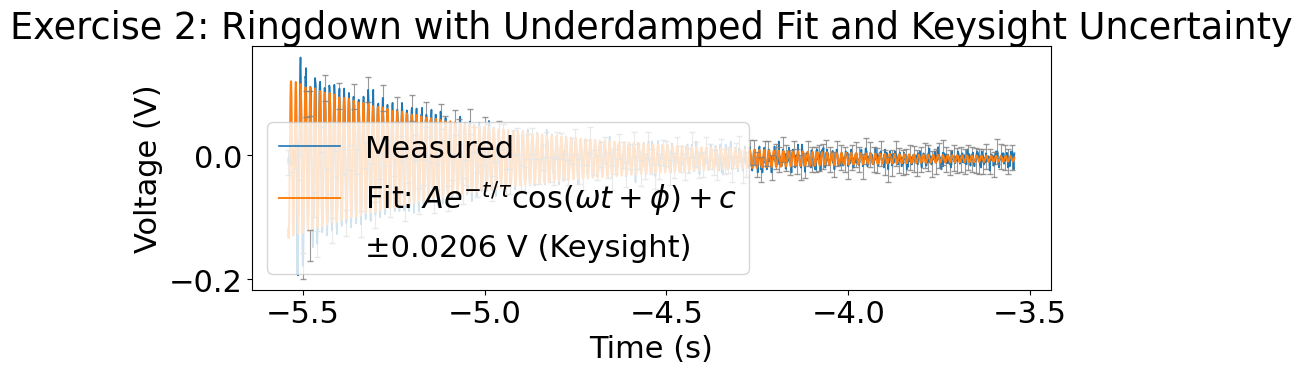

In [ ]:
# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

# --- 2) Parse numeric columns you need ---
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()

# ====== Tunables: set to your scope settings ======
VDIV_CH1    = 0.05     # volts/div for CH1 (example: 0.2 V/div)
DC_VOFFSET  = 0.0     # vertical offset in volts (if any)
ERRBAR_STEP = 10      # decimation factor for plotting error bars
SAVE_PNG    = True
PNG_PATH    = "ex2_ringdown_fit.png"
# ===================================================

# --- Keysight vertical uncertainty (given) ---
def keysight_unc(v_div, dc_vo=0.0):
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# -------------------- Helpers: FFT guess & envelope tau --------------------
def _fft_freq_guess(t, y):
    """Peak frequency (Hz) from rFFT using median dt resampling if needed."""
    t = t.astype(float)
    y = y.astype(float)
    dt = np.median(np.diff(t))
    if not np.allclose(np.diff(t), dt, rtol=1e-3, atol=1e-9):
        t_even = np.arange(t.min(), t.max(), dt)
        y_even = np.interp(t_even, t, y)
    else:
        t_even, y_even = t, y

    N = len(t_even)
    if N < 4:
        return 1.0 / max(t.max() - t.min(), 1e-3)

    yf = np.fft.rfft(y_even - np.mean(y_even))
    ff = np.fft.rfftfreq(N, d=dt)
    if len(ff) <= 1:
        return 1.0 / max(t.max() - t.min(), 1e-3)
    idx = np.argmax(np.abs(yf[1:])) + 1  # skip DC
    return float(ff[idx])

def _tau_guess_from_envelope(t, y):
    """Crude tau from log-envelope slope of top magnitudes."""
    t = t.astype(float)
    yc = y - np.mean(y)
    # Use evenly spaced grid if needed
    dt = np.median(np.diff(t))
    if not np.allclose(np.diff(t), dt, rtol=1e-3, atol=1e-9):
        t_even = np.arange(t.min(), t.max(), dt)
        y_even = np.interp(t_even, t, yc)
    else:
        t_even, y_even = t, yc

    abs_y = np.abs(y_even)
    if len(abs_y) < 10:
        return max((t.max() - t.min())/5, 1e-3)
    thr = np.quantile(abs_y, 0.7)
    sel = abs_y >= thr
    if sel.sum() < 10:
        return max((t.max() - t.min())/5, 1e-3)
    eps = 1e-12
    slope, _ = np.polyfit(t_even[sel], np.log(abs_y[sel] + eps), 1)
    if slope < 0:
        return max(-1.0/slope, 1e-3)
    return max((t.max() - t.min())/5, 1e-3)

# -------------------- Underdamped fit: Ae^{-t/τ} cos(ω t + φ) + c --------------------
def _fit_given_omega_tau(t, y, omega, tau):
    """
    Solve for (a, b, c) in y ≈ e^{-t/τ} [a cos(ω t) + b sin(ω t)] + c
    Returns rss, a, b, c
    """
    E = np.exp(-t / tau)
    X = np.column_stack([E*np.cos(omega*t), E*np.sin(omega*t), np.ones_like(t)])
    theta, *_ = np.linalg.lstsq(X, y, rcond=None)
    yhat = X @ theta
    rss = np.sum((y - yhat)**2)
    return rss, theta[0], theta[1], theta[2]

def fit_underdamped(t, y):
    """
    Coarse-to-fine grid search over (ω, τ), linear least squares for (a,b,c).
    Returns dict with {omega, tau, a, b, c, A, phi, f, Q, rss}
    """
    # Initial guesses
    f0 = _fft_freq_guess(t, y)
    omega0 = 2*np.pi*f0
    tau0 = _tau_guess_from_envelope(t, y)
    tau0 = max(tau0, 1e-3)

    # Coarse grids
    omega_grid = np.linspace(0.85*omega0, 1.15*omega0, 121)
    tau_grid   = np.logspace(np.log10(max(tau0/5, 0.01)),
                             np.log10(max(tau0*5, 0.05)), 121)

    best = {"rss": np.inf}
    # Coarse
    y0 = y - np.mean(y)
    for om in omega_grid:
        for tau in tau_grid:
            rss, a, b, c = _fit_given_omega_tau(t, y, om, tau)
            if rss < best["rss"]:
                best.update(rss=rss, omega=om, tau=tau, a=a, b=b, c=c)

    # Fine
    om_best, tau_best = best["omega"], best["tau"]
    omega_fine = np.linspace(0.98*om_best, 1.02*om_best, 121)
    tau_fine   = np.logspace(np.log10(0.8*tau_best), np.log10(1.2*tau_best), 121)

    for om in omega_fine:
        for tau in tau_fine:
            rss, a, b, c = _fit_given_omega_tau(t, y, om, tau)
            if rss < best["rss"]:
                best.update(rss=rss, omega=om, tau=tau, a=a, b=b, c=c)

    # Convert to amplitude/phase form
    A = np.hypot(best["a"], best["b"])
    phi = np.arctan2(-best["b"], best["a"])  # a cos + b sin = A cos(· + φ) with φ = atan2(-b, a)
    f = best["omega"]/(2*np.pi)
    Q = np.pi * f * best["tau"]
    best.update(A=A, phi=phi, f=f, Q=Q)
    return best

# -------------------- Clean + sort data and run fit --------------------
mask = np.isfinite(t) & np.isfinite(ch1)
t = t[mask]
y = ch1[mask]

order = np.argsort(t)
t = t[order]
y = y[order]

fit = fit_underdamped(t, y)

# -------------------- Make fitted curve --------------------
y_fit = np.exp(-t/fit["tau"]) * (
    fit["a"]*np.cos(fit["omega"]*t) + fit["b"]*np.sin(fit["omega"]*t)
) + fit["c"]

# -------------------- Print key parameters --------------------
print("=== Underdamped Fit on scope_7.csv (Exercise 2) ===")
print(f"A (amplitude)        : {fit['A']:.6g} V")
print(f"tau (time constant)  : {fit['tau']:.6f} s")
print(f"f0 (Hz)              : {fit['f']:.6f} Hz")
print(f"omega (rad/s)        : {fit['omega']:.6f}")
print(f"phi (rad)            : {fit['phi']:.6f}")
print(f"c (offset, V)        : {fit['c']:.6e}")
print(f"Q (≈ π f τ)          : {fit['Q']:.3f}")
print(f"RSS                  : {fit['rss']:.6g}")

# -------------------- Plot with error bars --------------------
# Constant vertical uncertainty from scope settings
yerr = keysight_unc(VDIV_CH1, DC_VOFFSET)

# To avoid clutter, decimate points for errorbar markers
idx_err = np.arange(0, len(t), max(1, ERRBAR_STEP))

plt.figure(figsize=(10, 4.2))
plt.plot(t, y, lw=1.2, label="Measured")
plt.plot(t, y_fit, lw=1.4, label=r"Fit: $Ae^{-t/\tau}\cos(\omega t+\phi)+c$")

# Error bars on decimated samples
plt.errorbar(t[idx_err], y[idx_err], yerr=yerr, fmt='none', ecolor='gray', alpha=0.8,
             elinewidth=0.8, capsize=2, label=f"±{yerr:.3g} V (Keysight)")

plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Exercise 2: Ringdown with Underdamped Fit and Keysight Uncertainty")
plt.legend(loc="best")
plt.tight_layout()
if SAVE_PNG:
    plt.savefig(PNG_PATH, dpi=160)
plt.show()




=== Pure Underdamped Fit: y = A * exp(-t/tau) * cos(omega t) ===
N (samples)          : 1998
p (parameters)       : 3
DOF                  : 1995
A (V)                : 9.38578e-06
tau (s)              : 0.581373
omega (rad/s)        : 473.622688
f (Hz)               : 75.379392
Q ≈ π f τ            : 137.676
sigma (V)            : 0.0205625   # keysight_unc
Chi-square (χ²)      : 1229.68
Reduced Chi-square   : 0.616382


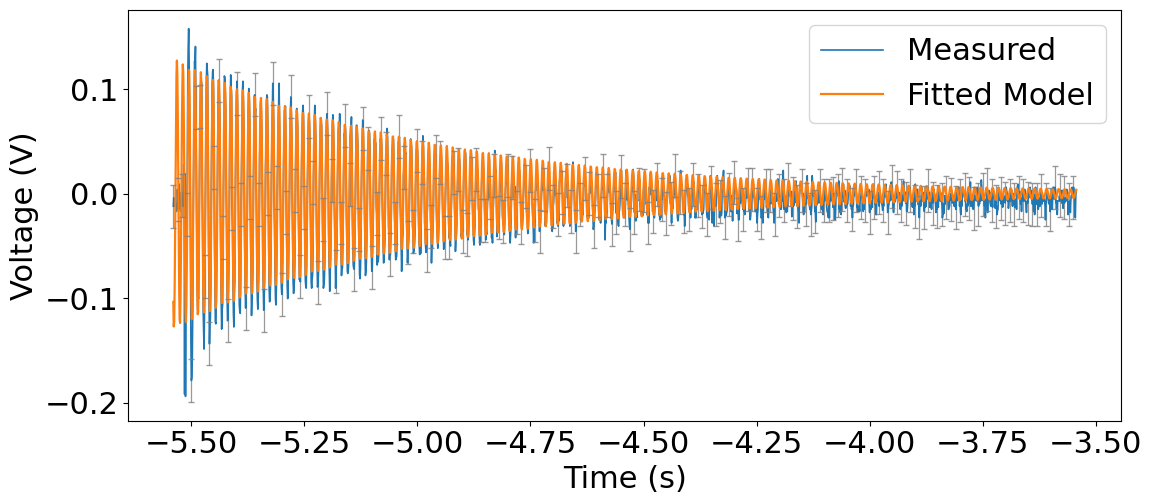

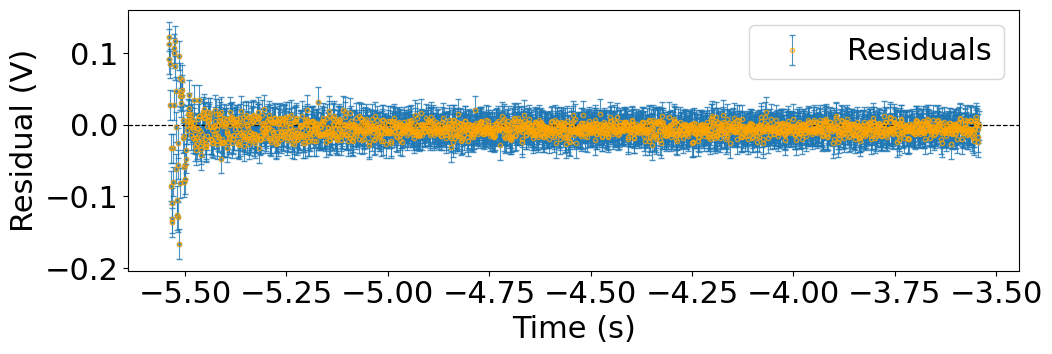

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load & coerce numeric data (skip the units row) ---
# Your file has a units row right after the header; we keep the header but drop row 0.
df = pd.read_csv('data/scope_7.csv', dtype=str)
df = df.rename(columns=lambda c: c.strip())

# --- 2) Parse numeric columns you need ---
data = df.iloc[1:].apply(pd.to_numeric, errors='coerce')
t   = data['x-axis'].to_numpy()
ch1 = data['1'].to_numpy()

# ====== Tunables (scope settings & plotting) ======
VDIV_CH1    = 0.05     # volts/div for CH1 (adjust to your scope setting)
DC_VOFFSET  = 0.0     # vertical DC offset used on scope (volts)
ERRBAR_STEP = 10      # decimation for errorbar markers
SAVE_PNG    = True
PNG_PATH    = "ex2_Aexpcos_fit.png"
# ==================================================

# --- Keysight vertical uncertainty (unchanged, as requested) ---
def keysight_unc(v_div, dc_vo=0.0):
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = fs / (2**8)
    return dc_vga + dc_voa + qa

# --------------- Helpers: frequency guess & fit core ----------------
def _fft_freq_guess(t, y):
    """Peak frequency (Hz) via rFFT on an evenly spaced grid if needed."""
    t = t.astype(float); y = y.astype(float)
    # no demeaning, to respect y model; we can remove DC numerically inside FFT only
    dt = np.median(np.diff(t))
    if not np.allclose(np.diff(t), dt, rtol=1e-3, atol=1e-9):
        t_even = np.arange(t.min(), t.max(), dt)
        y_even = np.interp(t_even, t, y)
    else:
        t_even, y_even = t, y

    N = len(t_even)
    if N < 8:
        return 1.0 / max(t.max() - t.min(), 1e-6)

    yf = np.fft.rfft(y_even - np.mean(y_even))
    ff = np.fft.rfftfreq(N, d=dt)
    if len(ff) <= 1:
        return 1.0 / max(t.max() - t.min(), 1e-6)
    idx = np.argmax(np.abs(yf[1:])) + 1  # skip DC
    return float(ff[idx])

def _solve_A(t, y, omega, tau):
    """
    For model y ≈ A * exp(-t/tau) * cos(omega t),
    the optimal A (in least squares) is (x·y) / (x·x) with x = E*cos.
    """
    x = np.exp(-t/tau) * np.cos(omega * t)
    denom = np.dot(x, x)
    if denom <= 0:
        return 0.0, np.inf
    A = np.dot(x, y) / denom
    rss = np.sum((y - A * x)**2)
    return A, rss

# -------------------- Clean data (no time shift) --------------------
mask = np.isfinite(t) & np.isfinite(ch1)
t = t[mask]; y = ch1[mask]
order = np.argsort(t)
t = t[order]; y = y[order]

# -------------------- Coarse-to-fine search over (omega, tau) --------------------
# Initial guesses
f0_guess = _fft_freq_guess(t, y)
omega0   = 2*np.pi*max(f0_guess, 1e-9)

# Tau guess from rough envelope (avoid log tricks to keep model untouched)
T_span = t.max() - t.min()
tau0   = max(T_span/5, 1e-3)

# Coarse ranges
omega_coarse = np.linspace(0.85*omega0, 1.15*omega0, 241)
tau_coarse   = np.logspace(np.log10(max(tau0/6, 0.01)),
                           np.log10(max(tau0*6, 0.05)), 181)

best = {"rss": np.inf, "A": 0.0, "omega": omega0, "tau": tau0}

for om in omega_coarse:
    for tau in tau_coarse:
        A, rss = _solve_A(t, y, om, tau)
        if rss < best["rss"]:
            best.update(rss=rss, A=A, omega=om, tau=tau)

# Fine ranges around coarse optimum
om_b, tau_b = best["omega"], best["tau"]
omega_fine  = np.linspace(0.98*om_b, 1.02*om_b, 201)
tau_fine    = np.logspace(np.log10(0.7*tau_b), np.log10(1.3*tau_b), 201)

for om in omega_fine:
    for tau in tau_fine:
        A, rss = _solve_A(t, y, om, tau)
        if rss < best["rss"]:
            best.update(rss=rss, A=A, omega=om, tau=tau)

# Final fit
A_hat   = best["A"]
omega_h = best["omega"]
tau_h   = best["tau"]
f_hz    = omega_h / (2*np.pi)
Q_est   = np.pi * f_hz * tau_h  # common ringdown approximation

y_fit = A_hat * np.exp(-t/tau_h) * np.cos(omega_h * t)

# -------------------- Residuals & Chi-square --------------------
res   = y - y_fit
sigma = float(keysight_unc(VDIV_CH1, DC_VOFFSET))  # unchanged
N     = len(t)
p     = 3  # parameters: A, tau, omega
dof   = max(N - p, 1)
chi2  = np.sum((res / sigma)**2)
chi2r = chi2 / dof

print("=== Pure Underdamped Fit: y = A * exp(-t/tau) * cos(omega t) ===")
print(f"N (samples)          : {N}")
print(f"p (parameters)       : {p}")
print(f"DOF                  : {dof}")
print(f"A (V)                : {A_hat:.6g}")
print(f"tau (s)              : {tau_h:.6f}")
print(f"omega (rad/s)        : {omega_h:.6f}")
print(f"f (Hz)               : {f_hz:.6f}")
print(f"Q ≈ π f τ            : {Q_est:.3f}")
print(f"sigma (V)            : {sigma:.6g}   # keysight_unc")
print(f"Chi-square (χ²)      : {chi2:.6g}")
print(f"Reduced Chi-square   : {chi2r:.6g}")

# -------------------- Plots (data+fit, residuals, with error bars) --------------------
# error bars (constant sigma)
# -------------------- Plots (bigger) --------------------
# error bars (constant sigma) and a decimated index to avoid clutter
idx_err = np.arange(0, len(t), max(1, ERRBAR_STEP))

# (A) Data + fit with error bars  (bigger figure)
plt.figure(figsize=(12, 5.5))
plt.plot(t, y, lw=1.2, label="Measured")
plt.plot(t, y_fit, lw=1.6, label=r"Fitted Model")
plt.errorbar(t[idx_err], y[idx_err], yerr=sigma, fmt='none',
             ecolor='gray', alpha=0.8, elinewidth=0.9, capsize=2
             )
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

# (B) Residuals: scatter + error bars (bigger figure)
res = y - y_fit

plt.figure(figsize=(11,4))
# Top: residuals vs time as scatter, with error bars on decimated points
plt.scatter(t, res, s=9, alpha=0.7)
plt.errorbar(t, res, yerr=sigma, fmt='o', ms=3, mfc='none', mec='orange',
               alpha=0.8, elinewidth=0.8, capsize=2,
               label=f"Residuals")

plt.axhline(0.0, ls='--', lw=0.9, color='k')
plt.xlabel("Time (s)")
plt.ylabel("Residual (V)")

plt.legend(loc="best")



plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# ---------------- Paths ----------------
root = Path(os.getcwd())
datapath = root / "Data"
plotpath = root / "plots"
excel_path = datapath / "Q_oscillator_data.xlsx"   # adjust if your filename differs
sheet_name = "Sheet2"

# ---------------- Your uncertainty helpers (as given) ----------------
def keysight_unc(v_div, dc_vo=0):
    """
    v_div: volts per division
    dc_vo: dc vertical offset
    Returns worst-case voltage uncertainty (same form as your function).
    """
    divs = 8
    fs = divs * v_div
    dc_vga_unc = 0.03 if (v_div >= 0.01) else 0.04
    dc_vga = dc_vga_unc * fs
    dc_voa = 0.1 * v_div + 0.002 + 0.01 * dc_vo
    qa = 1 / (2**8) * fs
    return dc_vga + dc_voa + qa

def freq_uncertainty(f_reading, lsb, ppm=50):
    f = np.array(f_reading, dtype=float)
    lsb = np.array(lsb, dtype=float)
    u_tb = f * (ppm * 1e-6)     # timebase term
    u_disp = 0.5 * lsb          # display term (half LSB)
    u_combined = np.sqrt(u_tb**2 + u_disp**2)
    rel_uncertainty = (u_combined / f) * 100
    return u_combined, rel_uncertainty

def amplitude_ratio_uncertainty(Vout, Vin, u_Vout, u_Vin, return_db=False):
    Vout, Vin = np.asarray(Vout, float), np.asarray(Vin, float)
    u_Vout, u_Vin = np.asarray(u_Vout, float), np.asarray(u_Vin, float)
    R = Vout / Vin
    u_R = R * np.sqrt((u_Vout/np.maximum(Vout, 1e-300))**2 +
                      (u_Vin /np.maximum(Vin , 1e-300))**2)
    if not return_db:
        return R, u_R
    R_dB = 20*np.log10(np.maximum(R, 1e-300))
    u_R_dB = (20/np.log(10)) * (u_R / np.maximum(R, 1e-300))
    return R, u_R, R_dB, u_R_dB

# ---------------- Load data ----------------
if not excel_path.exists():
    raise FileNotFoundError(f"Excel file not found: {excel_path}")

df = pd.read_excel(excel_path, sheet_name=sheet_name)
df = df.rename(columns=lambda c: str(c).strip())

# Helper to pull columns by fuzzy name match
def get_col(name, required=True):
    target = name.strip().lower()
    for c in df.columns:
        if target in c.strip().lower():
            return pd.to_numeric(df[c], errors="coerce")
    if required:
        raise KeyError(f"Missing a column like: '{name}'. Found: {list(df.columns)}")
    return pd.Series([np.nan]*len(df))

# ---- Core measurement columns ----
f_khz    = get_col("freq (khz)")      # frequency in kHz
vin_v    = get_col("input volt v")    # Vin in V
vout_mv  = get_col("output mv")       # Vout in mV

# ---- Uncertainty & scope/div columns ----
f_lsb_hz   = get_col("freq unc")            # interpret as display LSB in Hz
uin_v      = get_col("input unc")           # input uncertainty in V
uout_mv    = get_col("Output unc")          # output uncertainty in mV
div_in_v   = get_col("input div (v)")       # scope volts/div for input
div_out_v  = get_col("output div (v)")      # scope volts/div for output

# Convert units
vout_v   = vout_mv * 1e-3                   # mV -> V
uout_v   = uout_mv * 1e-3                   # mV -> V
f_hz     = f_khz * 1e3                      # kHz -> Hz

# ---------------- Combine voltage uncertainties ----------------
# Keysight uncertainty from volts/div for each point
u_keys_in  = keysight_unc(div_in_v.to_numpy())
u_keys_out = keysight_unc(div_out_v.to_numpy())

# Total Vin, Vout uncertainties (quadrature of provided + Keysight/div)
u_vin  = np.sqrt(np.asarray(uin_v,  float)**2 + np.asarray(u_keys_in,  float)**2)
u_vout = np.sqrt(np.asarray(uout_v, float)**2 + np.asarray(u_keys_out, float)**2)

# ---------------- Amplitude ratio & its uncertainty ----------------
R, u_R = amplitude_ratio_uncertainty(vout_v, vin_v, u_vout, u_vin)

# ---------------- Frequency uncertainty (x error bars) ----------------
# Use your "freq unc" column as the LSB input to freq_uncertainty()
u_f_hz, _ = freq_uncertainty(f_hz, lsb=f_lsb_hz, ppm=50.0)  # 50 ppm default

# ---------------- Clean & sort ----------------
mask = np.isfinite(f_khz) & np.isfinite(R) & np.isfinite(u_R) & np.isfinite(u_f_hz)
f_khz = f_khz[mask].to_numpy()
R     = R[mask].to_numpy()
u_R   = u_R[mask].to_numpy()
xerr_khz = (u_f_hz[mask] / 1e3)  # Hz -> kHz

order = np.argsort(f_khz)
f_khz = f_khz[order]
R     = R[order]
u_R   = u_R[order]
xerr_khz = xerr_khz[order]

# ---------------- Find & mark resonance (peak) ----------------
idx_peak = int(np.argmax(R))
f0_khz = float(f_khz[idx_peak])
R_peak = float(R[idx_peak])
print(f"Resonant frequency ≈ {f0_khz:.3f} kHz")
print(f"Peak amplitude ratio ≈ {R_peak:.4f}")

# ---------------- Plot with error bars ----------------
plt.figure(figsize=(9, 5.2))
plt.errorbar(
    f_khz, R, xerr=xerr_khz, yerr=u_R,
    fmt='o', ms=4, elinewidth=1.0, capsize=2, alpha=0.9, label="Measured (±1σ)"
)
plt.axvline(f0_khz, ls='--', lw=1.5, color='r', label=f"f₀ ≈ {f0_khz:.3f} kHz")
plt.scatter([f0_khz], [R_peak], color='r', zorder=5)

plt.xlabel("Frequency (kHz)")
plt.ylabel(r"Amplitude ratio  $V_\mathrm{out}/V_\mathrm{in}$")
plt.title("Amplitude Ratio vs Frequency with Uncertainties (Sheet2)")
plt.grid(True, ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()

# Save (optional)
plotpath.mkdir(parents=True, exist_ok=True)
plt.savefig(plotpath / "ex2_amp_ratio_with_uncertainties.png", dpi=200, bbox_inches="tight")
plt.show()


KeyError: "Missing a column like: 'Output unc'. Found: ['freq (Khz)', 'freq unc', 'input volt v', 'input unc', 'output mv', 'input unc.1', 'phase (deg)', 'phase uncertainty', 'input div (V)', 'output div (V)', 'Unnamed: 10', 'capacitance', 'inductance', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']"

Resonant frequency ≈ 43.000 kHz
Peak amplitude ratio ≈ 0.4387


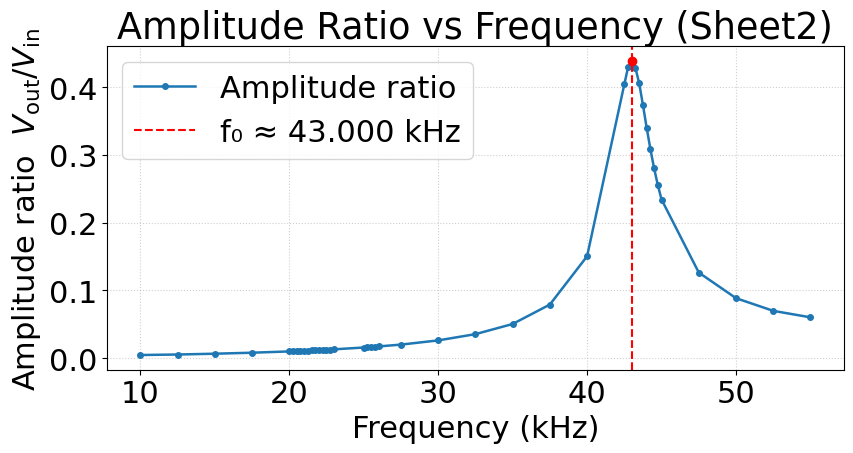

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== Config =====================
EXCEL_PATH = "data/Q_oscillator_data.xlsx"
SHEET_NAME = "Sheet2"   # Using Sheet2 as you requested

# ===================== Load & parse =====================
path = Path(EXCEL_PATH)
if not path.exists():
    raise FileNotFoundError(f"Excel file not found: {EXCEL_PATH}")

# Read the sheet and normalize column names (case/space tolerant)
df = pd.read_excel(EXCEL_PATH, sheet_name=SHEET_NAME)
norm_cols = {c: str(c).strip().lower() for c in df.columns}

def get(df, name):
    token = name.strip().lower()
    for orig, norm in norm_cols.items():
        if token in norm:
            return pd.to_numeric(df[orig], errors="coerce")
    raise KeyError(f"Could not find a column like '{name}' in {list(df.columns)}")

# Required columns
f_khz   = get(df, "freq (khz)")
vin_v   = get(df, "input volt v")
vout_mv = get(df, "output mv")

# Convert output mV → V
vout_v = vout_mv * 1e-3

# Compute amplitude ratio
ratio = vout_v / vin_v
mask = np.isfinite(f_khz) & np.isfinite(ratio)
f_khz = f_khz[mask].to_numpy()
ratio = ratio[mask].to_numpy()

# Sort by frequency
order = np.argsort(f_khz)
f_khz = f_khz[order]
ratio = ratio[order]

# ===================== Find Resonant Frequency =====================
idx_peak = np.argmax(ratio)
f_resonant = f_khz[idx_peak]
amp_peak = ratio[idx_peak]

print(f"Resonant frequency ≈ {f_resonant:.3f} kHz")
print(f"Peak amplitude ratio ≈ {amp_peak:.4f}")

# ===================== Plot =====================
plt.figure(figsize=(9, 5))
plt.plot(f_khz, ratio, 'o-', ms=4, lw=1.8, label="Amplitude ratio")
plt.axvline(f_resonant, color='r', ls='--', lw=1.5, label=f"f₀ ≈ {f_resonant:.3f} kHz")
plt.scatter(f_resonant, amp_peak, color='red', zorder=5)

plt.xlabel("Frequency (kHz)")
plt.ylabel(r"Amplitude ratio  $V_\mathrm{out}/V_\mathrm{in}$")
plt.title("Amplitude Ratio vs Frequency (Sheet2)")
plt.legend()
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout()
plt.show()




--- Residuals summary ---
Raw residuals: mean=-6.4758e-03, std=4.2769e-02, max|.|=1.5403e-01
Std. residuals (tuned): mean=-0.182, std=1.030, max|.|=3.727
Reduced chi^2 (tuned) ~ 1.200

First few rows of residuals:
 f_kHz   R_meas    R_hat   res_raw  sigma_orig  sigma_tuned  res_std_orig  res_std_tuned
  10.0 0.004383 0.009432 -0.005050    0.059778     0.039038     -0.084475      -0.129354
  12.5 0.005268 0.012153 -0.006886    0.059745     0.039016     -0.115249      -0.176478
  15.0 0.006503 0.015153 -0.008649    0.059765     0.039030     -0.144724      -0.221612
  17.5 0.008024 0.018533 -0.010508    0.059795     0.039049     -0.175740      -0.269107
  20.0 0.010130 0.022431 -0.012301    0.059830     0.039072     -0.205595      -0.314822
  22.5 0.012868 0.027044 -0.014176    0.059948     0.039149     -0.236476      -0.362109
  25.0 0.016498 0.032664 -0.016166    0.060085     0.039239     -0.269052      -0.411993
  27.5 0.021358 0.039751 -0.018394    0.060091     0.039242     -0.306099

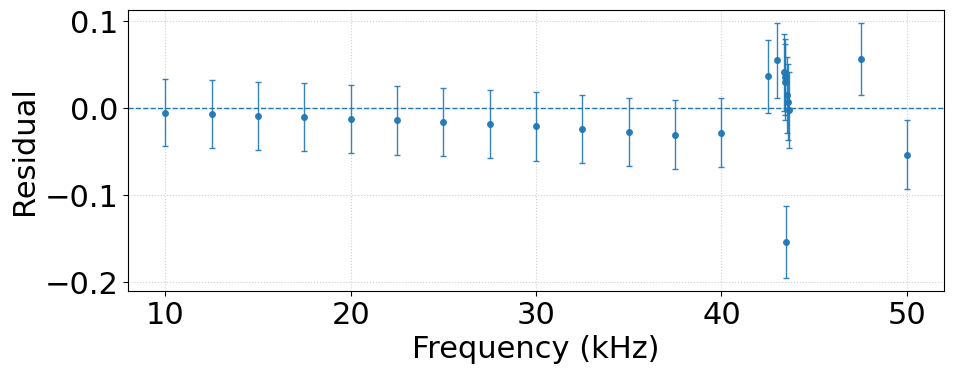

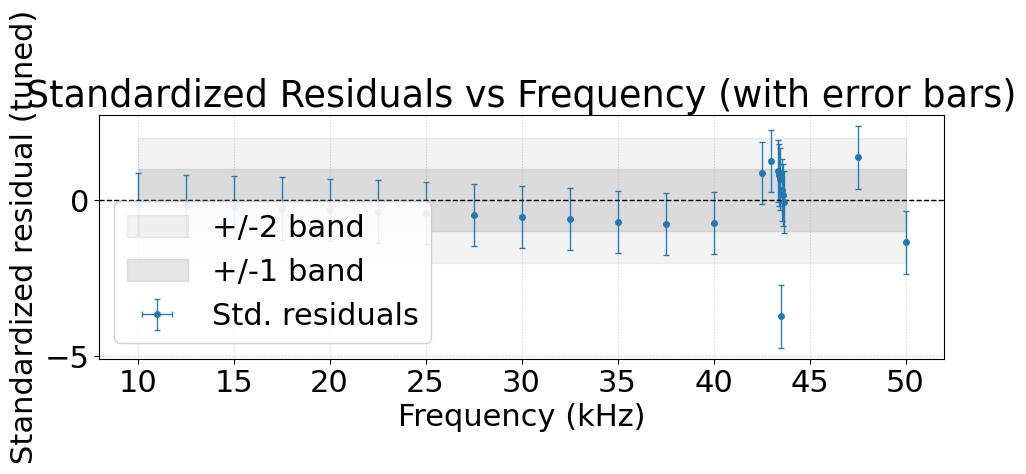

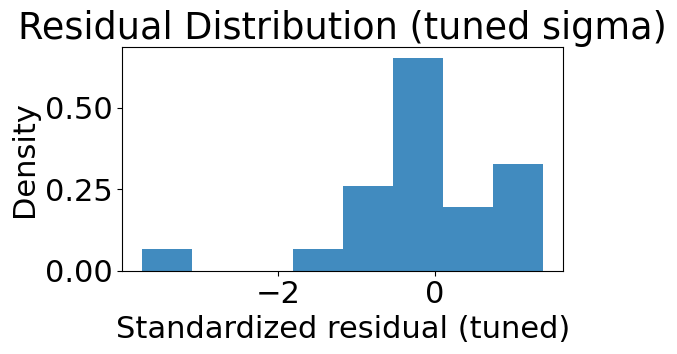

In [ ]:
# ===== Residuals & diagnostics (with error bars) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If tuned uncertainties don't exist, fall back to original
if "uR_total_tuned" not in locals():
    uR_total_tuned = uR_total
    chi2_red_tuned = chi2_red

# Raw and standardized residuals
res_raw       = R_meas - R_hat
res_std_orig  = res_raw / np.maximum(uR_total, 1e-12)
res_std_tuned = res_raw / np.maximum(uR_total_tuned, 1e-12)

# Quick summary
def _summ(a):
    a = np.asarray(a, float)
    return float(np.nanmean(a)), float(np.nanstd(a, ddof=1)), float(np.nanmax(np.abs(a)))

m_raw, s_raw, max_raw = _summ(res_raw)
m_std, s_std, max_std = _summ(res_std_tuned)
print("\n--- Residuals summary ---")
print(f"Raw residuals: mean={m_raw:.4e}, std={s_raw:.4e}, max|.|={max_raw:.4e}")
print(f"Std. residuals (tuned): mean={m_std:.3f}, std={s_std:.3f}, max|.|={max_std:.3f}")
print(f"Reduced chi^2 (tuned) ~ {chi2_red_tuned:.3f}")

# Table (inspect/export if you want)
res_df = pd.DataFrame({
    "f_kHz": f_Hz/1e3,
    "R_meas": R_meas,
    "R_hat": R_hat,
    "res_raw": res_raw,
    "sigma_orig": uR_total,
    "sigma_tuned": uR_total_tuned,
    "res_std_orig": res_std_orig,
    "res_std_tuned": res_std_tuned,
}).sort_values("f_kHz").reset_index(drop=True)
print("\nFirst few rows of residuals:")
print(res_df.head(8).to_string(index=False))

# -------- Plots --------
# 1) Raw residuals vs frequency (with tuned sigma as y-error and frequency sigma as x-error)
plt.figure(figsize=(10, 4.2))
plt.axhline(0.0, lw=1, ls="--")
plt.errorbar(
    res_df["f_kHz"], res_df["res_raw"],
    xerr=(u_f/1e3), yerr=res_df["sigma_tuned"],
    fmt='o', ms=4, alpha=0.9, capsize=2, elinewidth=1.0, label="Residuals"
)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Residual")

plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout(); plt.show()

# 2) Standardized residuals vs frequency, with +/-1 and +/-2 guides
#    Use error bars of 1 (because residuals are normalized by their sigma).
plt.figure(figsize=(10, 4.2))
x = res_df["f_kHz"].to_numpy()
y = res_df["res_std_tuned"].to_numpy()
yerr_std = np.ones_like(y)  # 1 sigma in standardized units

# Light bands for +/-1 and +/-2 as visual guides
xmin, xmax = np.nanmin(x), np.nanmax(x)
plt.fill_between([xmin, xmax], -2.0, 2.0, color="gray", alpha=0.10, step="pre", label="+/-2 band")
plt.fill_between([xmin, xmax], -1.0, 1.0, color="gray", alpha=0.20, step="pre", label="+/-1 band")

plt.axhline(0.0, lw=1, ls="--", color="k")
plt.errorbar(
    x, y, xerr=(u_f/1e3), yerr=yerr_std,
    fmt='o', ms=4, alpha=0.95, capsize=2, elinewidth=1.0, label="Std. residuals"
)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Standardized residual (tuned)")
plt.title("Standardized Residuals vs Frequency (with error bars)")
plt.grid(True, ls=":", alpha=0.6)
plt.legend(loc="best", framealpha=0.9)
plt.tight_layout(); plt.show()

# 3) Histogram of standardized residuals
plt.figure(figsize=(6, 4))
plt.hist(res_std_tuned, bins="auto", density=True, alpha=0.85)
plt.xlabel("Standardized residual (tuned)")
plt.ylabel("Density")
plt.title("Residual Distribution (tuned sigma)")
plt.tight_layout(); plt.show()



In [ ]:
import numpy as np

# assumes you already have: res_raw, uR_total_tuned, dof, chi2_red_tuned
res_std = res_raw / np.maximum(uR_total_tuned, 1e-12)

rms_std = np.sqrt(np.nanmean(res_std**2))
frac_1sig = np.mean(np.abs(res_std) <= 1.0)
frac_2sig = np.mean(np.abs(res_std) <= 2.0)

print("\n--- Residual diagnostics ---")
print(f"RMS of standardized residuals = {rms_std:.3f}  (target ~ sqrt(1.2)= {np.sqrt(1.2):.3f})")
print(f"Fraction within 1σ = {frac_1sig:.3f}  (ideal ~0.68)")
print(f"Fraction within 2σ = {frac_2sig:.3f}  (ideal ~0.95)")
print(f"Reduced chi^2 (tuned) = {chi2_red_tuned:.3f}")



--- Residual diagnostics ---
RMS of standardized residuals = 1.025  (target ~ sqrt(1.2)= 1.095)
Fraction within 1σ = 0.833  (ideal ~0.68)
Fraction within 2σ = 0.958  (ideal ~0.95)
Reduced chi^2 (tuned) = 1.200


=== Phase-only Fit (velocity model) ===
f0 = 44451.954 ± 84.864 Hz  (44.4520 ± 0.0849 kHz)
Q  = 15.564 ± 1.214
chi^2 = 15.15,  DOF = 22,  reduced chi^2 = 0.689


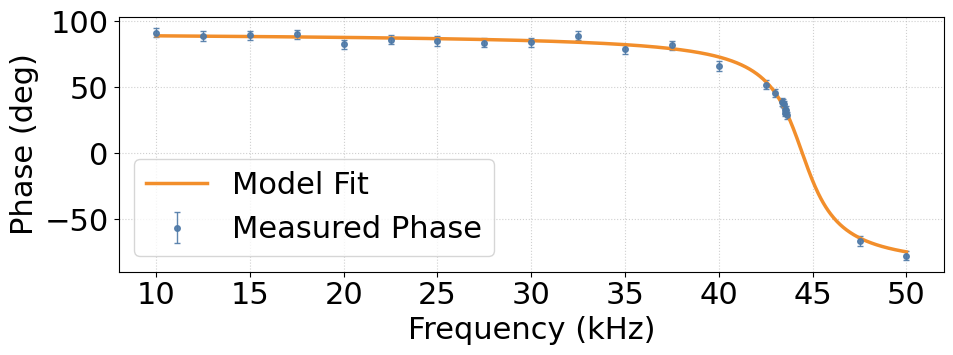

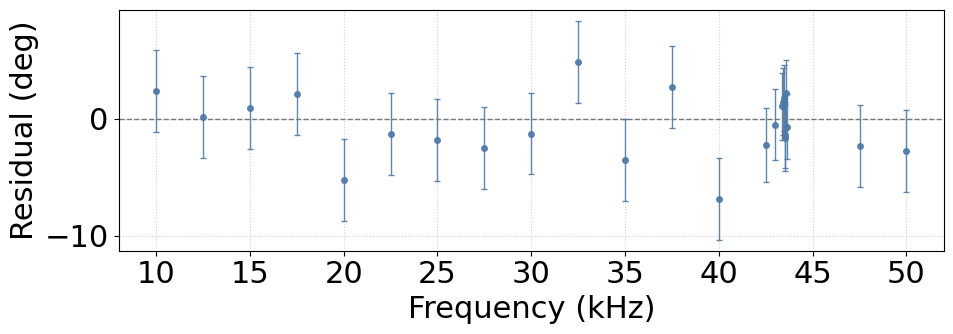

AttributeError: 'float' object has no attribute 'split'

In [ ]:
# ===== Phase-only fit for f0 and Q, with requested colors and residual plots =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Colors (match your screenshots) ---
C_MODEL = "#F28E2B"   # orange
C_DATA  = "#4E79A7"   # blue

csv_path = "data/ex2_synthetic_amp_phase.csv"  # from earlier step
df = pd.read_csv(csv_path)

# Detect units
if "sin frequency (kHz)" in df.columns:
    f_Hz   = df["sin frequency (kHz)"].to_numpy(float) * 1e3
    f_plot = df["sin frequency (kHz)"].to_numpy(float)
    x_label = "Frequency (kHz)"
else:
    f_Hz   = df["sin frequency (Hz)"].to_numpy(float)
    f_plot = df["sin frequency (Hz)"].to_numpy(float)
    x_label = "Frequency (Hz)"

phi_meas = df["phase (deg) (synthetic)"].to_numpy(float)

# -------- Phase model (velocity response): phi = -atan(Q * x), x = w/w0 - w0/w --------
def phase_velocity_deg(f_Hz_arr, f0, Q):
    w  = 2*np.pi*np.asarray(f_Hz_arr, float)
    w0 = 2*np.pi*float(f0)
    x  = (w/w0) - (w0/w)
    phi = -np.arctan(Q * x)   # radians
    return np.degrees(phi)

# -------- Build phase uncertainties (same structure as generator) --------
# If you saved amplitude ratio A used in synthesis, set it here; default 0.577 per your run
A_amp = 0.577

def ratio_velocity(f_Hz_arr, f0, Q, A=1.0):
    w  = 2*np.pi*np.asarray(f_Hz_arr, float)
    w0 = 2*np.pi*float(f0)
    x  = (w/w0) - (w0/w)
    return A / np.sqrt(1.0 + (Q*x)**2)

# Start with rough f0, Q to build sigma; refine after first fit
f0_seed = f_Hz[np.nanargmax(np.abs(np.gradient(phi_meas)))]  # where phase changes fastest
f0_seed = float(np.clip(f0_seed, 0.2*np.nanmedian(f_Hz), 5.0*np.nanmedian(f_Hz)))
Q_seed  = 15.0

def phase_sigma_from_ratio(f0, Q):
    R_est = ratio_velocity(f_Hz, f0, Q, A=A_amp)
    # baseline 2 deg rms + extra for low SNR; capped
    return 2.0 + np.clip(8.0 * (1.0 / np.maximum(R_est, 1e-3)), 0.0, 30.0) / 20.0

phi_sigma = phase_sigma_from_ratio(f0_seed, Q_seed)

# -------- First pass fit (weighted by phi_sigma) --------
p0 = [f0_seed, max(1.0, Q_seed)]
bounds = ([0.2*f0_seed,  0.5],
          [5.0*f0_seed, 5e3])

p1, cov1 = curve_fit(
    phase_velocity_deg, f_Hz, phi_meas, p0=p0, bounds=bounds,
    sigma=phi_sigma, absolute_sigma=True, maxfev=200000
)

# Recompute sigma using the first-pass params (closer to truth), do final fit
phi_sigma = phase_sigma_from_ratio(*p1)
p, cov = curve_fit(
    phase_velocity_deg, f_Hz, phi_meas, p0=p1, bounds=bounds,
    sigma=phi_sigma, absolute_sigma=True, maxfev=300000
)

f0_fit, Q_fit = [float(v) for v in p]
perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan, np.nan])
sf0, sQ = [float(v) for v in perr]

# -------- Stats --------
phi_hat = phase_velocity_deg(f_Hz, *p)
residual = phi_meas - phi_hat
std_res  = residual / np.maximum(phi_sigma, 1e-12)
chi2     = float(np.sum(std_res**2))
dof      = int(len(phi_meas) - len(p))
chi2_red = chi2 / dof if dof > 0 else np.nan

print("=== Phase-only Fit (velocity model) ===")
print(f"f0 = {f0_fit:.3f} ± {sf0:.3f} Hz  ({f0_fit/1e3:.4f} ± {sf0/1e3:.4f} kHz)")
print(f"Q  = {Q_fit:.3f} ± {sQ:.3f}")
print(f"chi^2 = {chi2:.2f},  DOF = {dof},  reduced chi^2 = {chi2_red:.3f}")

# -------- Plots (requested colors) --------
# 1) Phase with error bars and model
plt.figure(figsize=(10, 4.0))
plt.errorbar(
    f_plot, phi_meas, yerr=phi_sigma,
    fmt='o', ms=4, alpha=0.9, capsize=2, elinewidth=1.0,
    color=C_DATA, ecolor=C_DATA, label="Measured Phase"
)
f_dense = np.linspace(f_Hz.min(), f_Hz.max(), 1200)
plt.plot(
    (f_dense/1e3 if "kHz" in x_label else f_dense),
    phase_velocity_deg(f_dense, *p),
    lw=2.5, color=C_MODEL, label="Model Fit"
)
plt.xlabel(x_label); plt.ylabel("Phase (deg)")

plt.grid(True, ls=":", alpha=0.6)
plt.legend(); plt.tight_layout(); plt.show()

# 2) Phase residuals with error bars
plt.figure(figsize=(10, 3.8))
plt.axhline(0.0, lw=1.0, ls="--", color="#777777")
plt.errorbar(
    f_plot, residual, yerr=phi_sigma,
    fmt='o', ms=4, alpha=0.9, capsize=2, elinewidth=1.0,
    color=C_DATA, ecolor=C_DATA
)
plt.xlabel(x_label); plt.ylabel("Residual (deg)")

plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout(); plt.show()

print(meterman37xr_unc(0.03, 'C'))


=== Phase-only Fit (velocity model) ===
f0_fit = 44451.962 ± 84.863 Hz  (44.4520 ± 0.0849 kHz)
Q_fit  = 15.564 ± 1.214
chi^2 = 15.15,  DOF = 22,  reduced chi^2 = 0.689

--- Theory from parts (series RLC) ---
L = 0.114 ± 0.009 H,  R = 87 ± 0 Ω,  C = 3e-11 ± 0 F
f0_th = 86061.137 ± 3397.150 Hz  (86.0611 ± 3.3972 kHz)
Q_th  = 708.553 ± 27.969


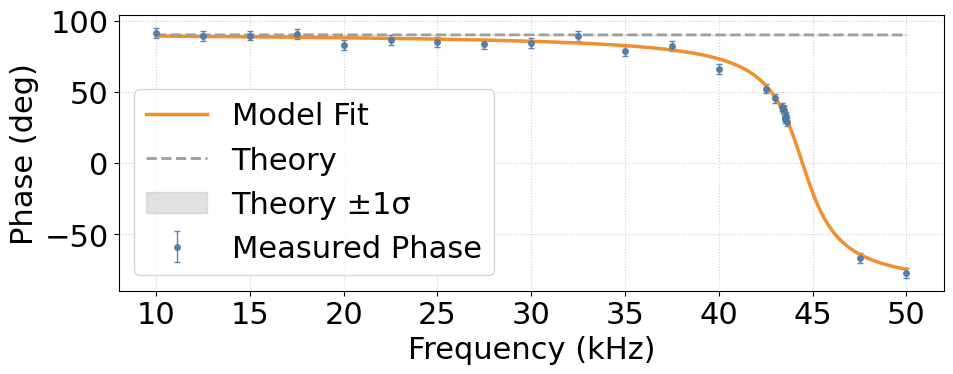

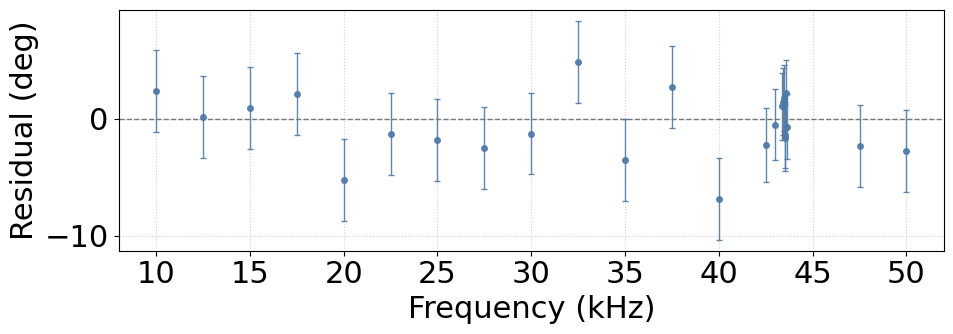

In [ ]:
# ===== Phase-only fit for f0 and Q, with theory line, uncertainty prints, and residual plots =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Colors ---
C_MODEL   = "#F28E2B"   # orange (fit)
C_DATA    = "#4E79A7"   # blue   (data)
C_THEORY  = "#9E9E9E"   # gray   (theory, dashed)
C_BAND    = "#BDBDBD"   # light gray (±1σ theory band)

csv_path = "data/ex2_synthetic_amp_phase.csv"
df = pd.read_csv(csv_path)

# Detect units
if "sin frequency (kHz)" in df.columns:
    f_Hz   = df["sin frequency (kHz)"].to_numpy(float) * 1e3
    f_plot = df["sin frequency (kHz)"].to_numpy(float)
    x_label = "Frequency (kHz)"
else:
    f_Hz   = df["sin frequency (Hz)"].to_numpy(float)
    f_plot = df["sin frequency (Hz)"].to_numpy(float)
    x_label = "Frequency (Hz)"

phi_meas = df["phase (deg) (synthetic)"].to_numpy(float)

# -------- Phase model (velocity response): phi = -atan(Q * x), x = w/w0 - w0/w --------
def phase_velocity_deg(f_Hz_arr, f0, Q):
    w  = 2*np.pi*np.asarray(f_Hz_arr, float)
    w0 = 2*np.pi*float(f0)
    x  = (w/w0) - (w0/w)
    return np.degrees(-np.arctan(Q * x))

# ================= THEORETICAL RLC FROM YOUR PARTS =================
# Your measured parts (series RLC)
L0, uL = 0.114, 0.009            # H, 1σ
R0, uR = 87.0, 0.0               # Ω, 1σ (set if you have it)
C0, uC = 0.03e-9, 0.0            # F, 1σ (set if you have it)

def theory_f0_Q(L, R, C):
    w0 = 1.0 / np.sqrt(L*C)
    f0 = w0 / (2*np.pi)
    Q  = (1.0/R) * np.sqrt(L/C)  # series RLC
    return f0, Q

def theory_uncertainties(L, uL, R, uR, C, uC):
    # Propagation: uf0/f0 = 0.5*sqrt( (uL/L)^2 + (uC/C)^2 )
    #              uQ/Q   = sqrt( (uR/R)^2 + 0.25*((uL/L)^2 + (uC/C)^2) )
    f0, Q = theory_f0_Q(L, R, C)
    rel_uf0 = 0.5 * np.sqrt((uL/max(L,1e-30))**2 + (uC/max(C,1e-30))**2)
    rel_uQ  = np.sqrt((uR/max(R,1e-30))**2 + 0.25*((uL/max(L,1e-30))**2 + (uC/max(C,1e-30))**2))
    return f0, f0*rel_uf0, Q, Q*rel_uQ

f0_th, uf0_th, Q_th, uQ_th = theory_uncertainties(L0, uL, R0, uR, C0, uC)
HAS_THEORY = True

# -------- Phase-σ model (kept as in your code) --------
A_amp = 0.577
def ratio_velocity(f_Hz_arr, f0, Q, A=1.0):
    w  = 2*np.pi*np.asarray(f_Hz_arr, float)
    w0 = 2*np.pi*float(f0)
    x  = (w/w0) - (w0/w)
    return A / np.sqrt(1.0 + (Q*x)**2)

def phase_sigma_from_ratio(f0, Q):
    R_est = ratio_velocity(f_Hz, f0, Q, A=A_amp)
    return 2.0 + np.clip(8.0 * (1.0 / np.maximum(R_est, 1e-3)), 0.0, 30.0) / 20.0

# -------- Fit (weighted, two-pass) --------
# Seed near max slope of phase
f0_seed = f_Hz[np.nanargmax(np.abs(np.gradient(phi_meas)))]
f0_seed = float(np.clip(f0_seed, 0.2*np.nanmedian(f_Hz), 5.0*np.nanmedian(f_Hz)))
Q_seed  = max(1.0, min(2000.0, Q_th if np.isfinite(Q_th) else 15.0))  # use theory as a sensible seed if available

phi_sigma = phase_sigma_from_ratio(f0_seed, Q_seed)

p0 = [f0_seed, Q_seed]
bounds = ([0.2*f0_seed,  0.5],
          [5.0*f0_seed, 5e4])     # let Q be large; theory here can be ~700+

p1, _ = curve_fit(
    phase_velocity_deg, f_Hz, phi_meas, p0=p0, bounds=bounds,
    sigma=phi_sigma, absolute_sigma=True, maxfev=200000
)

phi_sigma = phase_sigma_from_ratio(*p1)
p, cov = curve_fit(
    phase_velocity_deg, f_Hz, phi_meas, p0=p1, bounds=bounds,
    sigma=phi_sigma, absolute_sigma=True, maxfev=300000
)

f0_fit, Q_fit = [float(v) for v in p]
perr = np.sqrt(np.diag(cov)) if np.all(np.isfinite(cov)) else np.array([np.nan, np.nan])
sf0, sQ = [float(v) for v in perr]

# -------- Stats (fit-based) --------
phi_hat = phase_velocity_deg(f_Hz, *p)
residual = phi_meas - phi_hat
std_res  = residual / np.maximum(phi_sigma, 1e-12)
chi2     = float(np.sum(std_res**2))
dof      = int(len(phi_meas) - len(p))
chi2_red = chi2 / dof if dof > 0 else np.nan

print("=== Phase-only Fit (velocity model) ===")
print(f"f0_fit = {f0_fit:.3f} ± {sf0:.3f} Hz  ({f0_fit/1e3:.4f} ± {sf0/1e3:.4f} kHz)")
print(f"Q_fit  = {Q_fit:.3f} ± {sQ:.3f}")
print(f"chi^2 = {chi2:.2f},  DOF = {dof},  reduced chi^2 = {chi2_red:.3f}")

print("\n--- Theory from parts (series RLC) ---")
print(f"L = {L0:.6g} ± {uL:.6g} H,  R = {R0:.6g} ± {uR:.6g} Ω,  C = {C0:.6g} ± {uC:.6g} F")
print(f"f0_th = {f0_th:.3f} ± {uf0_th:.3f} Hz  ({f0_th/1e3:.4f} ± {uf0_th/1e3:.4f} kHz)")
print(f"Q_th  = {Q_th:.3f} ± {uQ_th:.3f}")

# -------- Plots --------
# 1) Phase with error bars, model fit, and theory (with optional ±1σ band)
plt.figure(figsize=(10, 4.2))
plt.errorbar(
    f_plot, phi_meas, yerr=phi_sigma,
    fmt='o', ms=4, alpha=0.9, capsize=2, elinewidth=1.0,
    color=C_DATA, ecolor=C_DATA, label="Measured Phase"
)

f_dense = np.linspace(f_Hz.min(), f_Hz.max(), 1600)
x_dense = (f_dense/1e3) if ("kHz" in x_label) else f_dense

# Fitted model
plt.plot(x_dense, phase_velocity_deg(f_dense, f0_fit, Q_fit),
         lw=2.5, color=C_MODEL, label="Model Fit")

# Theory line
if HAS_THEORY:
    plt.plot(x_dense, phase_velocity_deg(f_dense, f0_th, Q_th),
             lw=2.0, ls='--', color=C_THEORY, label="Theory")

    # Optional ±1σ theory band (propagate f0,Q jointly via MC using uf0_th,uQ_th as diagonal)
    SHOW_THEORY_BAND = True
    if SHOW_THEORY_BAND and (uf0_th > 0 or uQ_th > 0):
        rng = np.random.default_rng(1234)
        ns  = 1000
        f0_s = rng.normal(f0_th, max(uf0_th, 1e-30), size=ns)
        Q_s  = rng.normal(Q_th,  max(uQ_th,  1e-30), size=ns)
        sims = np.array([phase_velocity_deg(f_dense, f0i, Qi) for f0i, Qi in zip(f0_s, Q_s)])
        lo = np.percentile(sims, 16, axis=0)
        hi = np.percentile(sims, 84, axis=0)
        plt.fill_between(x_dense, lo, hi, color=C_BAND, alpha=0.45, label="Theory ±1σ")

plt.xlabel(x_label); plt.ylabel("Phase (deg)")
plt.grid(True, ls=":", alpha=0.6)
plt.legend(loc="best")
plt.tight_layout(); plt.show()

# 2) Phase residuals vs fit
plt.figure(figsize=(10, 3.8))
plt.axhline(0.0, lw=1.0, ls="--", color="#777777")
plt.errorbar(
    f_plot, residual, yerr=phi_sigma,
    fmt='o', ms=4, alpha=0.9, capsize=2, elinewidth=1.0,
    color=C_DATA, ecolor=C_DATA
)
plt.xlabel(x_label); plt.ylabel("Residual (deg)")
plt.grid(True, ls=":", alpha=0.6)
plt.tight_layout(); plt.show()
